In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 사용 함수

In [3]:
# 한글 패치 진행

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [4]:
# 파이차트 만들기 함수

def make_pie_chart(df_list,colname = "연령대"):

    fig, ax = plt.subplots(1,len(df_list),figsize = (15,5))

    for i, df in enumerate(df_list):
        age_counts = df[[colname]].value_counts().head(10)
        labels = age_counts.index.tolist()
        sizes = age_counts.values

        ax[i].pie(sizes,
           labels = labels,
           #explode=explode,
           autopct = '%1.1f%%',
           shadow = True, startangle= 90)
        ax[i].set_title(f"{2021 + i} {colname} 파이차트")

    plt.show()

In [5]:
# Butterfly Plot 그리기 함수

def make_butterfly_chart(df1, df2, year = 2020):

    # Butterfly Chart

    plt.figure(figsize = (10,6))

    # 데이터 그리기
    sns.barplot(data = df1, y = '가맹점업종명', x = 'count' , color = 'BLue', label = '2030', errorbar=None)
    sns.barplot(data = df2, y = '가맹점업종명', x = 'count' , color = 'Red', label = '4050', errorbar=None ,estimator = lambda x: -sum(x))

    # 축과 레이블 설정
    plt.axvline(0, color = 'grey', linestyle = '--')
    plt.axis('tight')
    plt.subplots_adjust(left = 0.1, right = 0.9, top = 0.9, bottom = 0.1)

    plt.gca().spines['top'].set_visible(False)   
    plt.gca().spines['right'].set_visible(False) 
    plt.gca().spines['left'].set_visible(False)    
    plt.gca().spines['bottom'].set_visible(False)   

    plt.title(f"{year}년 세대별 소비 횟수 비교", fontsize=17)
    plt.show()

In [6]:
# 두 집단의 범주 차이 비교

# 나이대로 데이터 분할

#capital_2030 = capital_data[capital_data['연령대'].isin(['20대', '30대'])]
#capital_4050 = capital_data[capital_data['연령대'].isin(['40대', '50대'])]

def age_compare_(category_col_1, category_col_2, category_name, df1, df2, hue = '성별'):

    fig, ax = plt.subplots(1,2,figsize = (14,6))

    sns.barplot(x = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df1[category_col_1][df1[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[0], #hue=df1[hue][df1[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[0].pick_params(axis = 'x', rotation = 45)
    ax[0].set_title(f"{category_col_2}, {category_name} Barplot Of df1")

    sns.barplot(x = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).index,
                y = df2[category_col_1][df2[category_col_2] == category_name].value_counts(normalize=True).head(10).values,
                ax = ax[1], #hue=df2[hue][df2[category_col_2] == category_name].head(10) if hue else None
                )
    #ax[1].pick_params(axis = 'x', rotation = 45)
    ax[1].set_title(f"{category_col_1}, {category_name} Barplot Of df2")

    plt.tight_layout()
    plt.show()

In [7]:
'''

data = pd.read_csv('sampled_data/final_data.csv')
data['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')
#data = data.drop('Unnamed: 0', axis= 1)
'''

"\n\ndata = pd.read_csv('sampled_data/final_data.csv')\ndata['거래년월'] = pd.to_datetime(data['거래년월'], format='%Y-%m-%d')\n#data = data.drop('Unnamed: 0', axis= 1)\n"

In [8]:
'''
data_tmp = pd.read_csv('sampled_data/capital_data.csv')
data_tmp.info()
'''

"\ndata_tmp = pd.read_csv('sampled_data/capital_data.csv')\ndata_tmp.info()\n"

In [9]:
'''
seoul_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/등록인구_20241105141249.csv')
gyeonggy_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/시군별_세대_및_인구_20241105142246.csv', encoding = 'cp949')
'''

"\nseoul_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/등록인구_20241105141249.csv')\ngyeonggy_pop = pd.read_csv('C:/Users/campus3S031/Desktop/iM뱅크 프로젝트용 데이터/파생 데이터/시군별_세대_및_인구_20241105142246.csv', encoding = 'cp949')\n"

In [10]:
'''
# seoul_pop의 컬럼명 변경
seoul_pop = seoul_pop.rename(columns={'시': '시도', '구': '시군구'})
gyeonggy_pop = gyeonggy_pop.rename(columns={'자택_시도': '시도', '자택_시군구': '시군구'})
total_pop = pd.concat([seoul_pop, gyeonggy_pop], axis = 0)
total_pop
'''

"\n# seoul_pop의 컬럼명 변경\nseoul_pop = seoul_pop.rename(columns={'시': '시도', '구': '시군구'})\ngyeonggy_pop = gyeonggy_pop.rename(columns={'자택_시도': '시도', '자택_시군구': '시군구'})\ntotal_pop = pd.concat([seoul_pop, gyeonggy_pop], axis = 0)\ntotal_pop\n"

In [11]:
'''
data_tmp['가맹점_시군구'] = data_tmp['가맹점_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})

data_tmp['자택_시군구'] = data_tmp['자택_시군구'].replace({
    '부천시 원미구': '부천시',
    '부천시 오정구': '부천시',
    '부천시 소사구': '부천시'
})
'''

"\ndata_tmp['가맹점_시군구'] = data_tmp['가맹점_시군구'].replace({\n    '부천시 원미구': '부천시',\n    '부천시 오정구': '부천시',\n    '부천시 소사구': '부천시'\n})\n\ndata_tmp['자택_시군구'] = data_tmp['자택_시군구'].replace({\n    '부천시 원미구': '부천시',\n    '부천시 오정구': '부천시',\n    '부천시 소사구': '부천시'\n})\n"

In [12]:
'''
# 데이터 전처리 및 병합 - 가맹점 기준 인구 병합
# total_pop의 컬럼명 변경
total_pop = total_pop.rename(columns={'시도': '가맹점_광역시도', '시군구': '가맹점_시군구', '인구': '가맹점_인구'})

# 데이터 병합
merged_data = data_tmp.merge(total_pop, 
                        on=['가맹점_광역시도', '가맹점_시군구', '년도'],
                        how='left')

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)
'''

'\n# 데이터 전처리 및 병합 - 가맹점 기준 인구 병합\n# total_pop의 컬럼명 변경\ntotal_pop = total_pop.rename(columns={\'시도\': \'가맹점_광역시도\', \'시군구\': \'가맹점_시군구\', \'인구\': \'가맹점_인구\'})\n\n# 데이터 병합\nmerged_data = data_tmp.merge(total_pop, \n                        on=[\'가맹점_광역시도\', \'가맹점_시군구\', \'년도\'],\n                        how=\'left\')\n\n# 결과 확인\nprint("\n병합 결과:")\nmerged_data.head(1)\n'

In [13]:
'''
# 데이터 전처리 및 병합 - 자택 기준 인구 병합
# total_pop의 컬럼명 변경

total_pop_2 = total_pop.rename(columns={'가맹점_광역시도': '자택_시도', '가맹점_시군구': '자택_시군구', '가맹점_인구': '자택_인구'})

# 데이터 병합
merged_data = merged_data.merge(total_pop_2, 
                        on=['자택_시도', '자택_시군구', '년도'],
                        how='left')

merged_data.fillna(0, inplace=True)

# 결과 확인
print("\n병합 결과:")
merged_data.head(1)
'''

'\n# 데이터 전처리 및 병합 - 자택 기준 인구 병합\n# total_pop의 컬럼명 변경\n\ntotal_pop_2 = total_pop.rename(columns={\'가맹점_광역시도\': \'자택_시도\', \'가맹점_시군구\': \'자택_시군구\', \'가맹점_인구\': \'자택_인구\'})\n\n# 데이터 병합\nmerged_data = merged_data.merge(total_pop_2, \n                        on=[\'자택_시도\', \'자택_시군구\', \'년도\'],\n                        how=\'left\')\n\nmerged_data.fillna(0, inplace=True)\n\n# 결과 확인\nprint("\n병합 결과:")\nmerged_data.head(1)\n'

In [14]:
'''
merged_data.drop(['Unnamed: 0'], axis=1, inplace=True)
data = merged_data
'''

"\nmerged_data.drop(['Unnamed: 0'], axis=1, inplace=True)\ndata = merged_data\n"

In [15]:
#data.to_csv('sampled_data/capital_data_1108.csv', index=False)

# 데이터 확인
- raw data 기반으로 작업한것과 기본 데이터를 바탕으로 얼마나 차이가 있는지 확인
- 차이가 없거나 매우 적다면 이느 층화추출이 잘 된 결과임을 의미한다.

In [16]:
# raw

#data2 = pd.read_csv('sampled_data/rawdata_pj1.csv')

In [17]:
# sampled

data = pd.read_csv('sampled_data/final_data_1111.csv')

## 2차 중분류 추가

In [18]:
# 중분류

food_related = [
    '기타건강식품', '기타음료식품', '서양음식', '정육점', '제과점', '주점', '유흥주점', '단란주점', '일반한식', '일식·회집', '스넥', '중국식', '칵테일바', '편 의 점',
    '농,축협직영매장', '농·축·수산품', '농축수산가공품',  '주류판매점'
]

retail = [
    '가 방', '기타 사무용품', '기타잡화', '기타전기제품', '대형할인점', 
    '목재·석재·철물', '문구용품', '소프트웨어', '슈퍼마켓',
    '자동차부품', '종합용역', '출판 및 인쇄물', '컴퓨터', '통신기기', '홍삼제품', 
    '화원', 'DP&E', '기계공구', '기념품점', '사무용 OA기기', '미곡상', '비료,사료,종자',  
    '화방·표구점', '민예·공예품', '면 세 점', '인테리어전문', '조명기구', '보일러·펌프·샷시', '건축용 요업제품', '페인트', '음반영상물', '농기계', 
    '시 계', '단체복', '제 화', '농협하나로클럽','아동의류', '연 쇄 점', '완구점'
]

life = [
    '가전제품', '기타가구', '기타의류', '신 발', '안경', '액세서리', '일반가구',
    '일반서적', '내의판매', '세탁소', '화장품', '침구·수예점', '신 발', '안경', '귀금속','정수기', '정장',
    '주방용구', '주방용식기'
]

med = [
    '의료용품', '치과의원', '종합병원', '한방병원', '치과병원', '기타의료기관 및 기타의료기기','병 원(응급실운영)',
    '한 의 원', '약 국',  '의 원', '건강진단', '동물병원'
]

online = [
    '인터넷Mall', '인터넷종합Mall', 'CATV홈쇼핑','CATV'
]

education = [
    '학원', '독서실', '기타 교육기관', '학습지교육', '초중고교육기관', '유아원', '기능학원', '예·체능계학원',
    '외국어학원', '보습학원', '전문서적'
]

service = [
    '가례서비스업', '공공요금대행서비스/소득공제대상', '공공요금대행서비스/소득공제비대상', '기타대인서비스',
    '미용원', '미용재료', '사무서비스', '조세서비스', '통신서비스/소득공제비대상',
    '피부미용실', '혼례서비스업', '애완동물',
    '기타숙박업', '보관및 창고업', '비씨카드 정산용(할인)',
    '위탁급식업', '상품권전문판매', '부동산중개·임대', 
    '이동통신요금', '일반(통신판매)', '통신판매업1', '티켓', '맞춤복점',
    'PG상품권', '가정용품수리', '구내매점(국가기관등)', '손해보험', '전자상거래상품권전문판매', 
    '위성방송', '비씨카드 정산용가맹점', '비영리/대상', '비영리/비대상', '사무·통신기기수리', '상 품 권', '생명보험',
    '자사카드발행백화점', '전자상거래상품권', '이용원'
]

lesuire = [
    '골프경기장', '골프연습장', '스크린골프','당구장','스포츠·레져용품', '스포츠의류', '기타레져업소', '레져업소',
    '영화관', '헬스클럽', '종합레져타운', '수족관', '콘도', '안마/스포츠마사지', '관광여행', '노 래 방',
    '문화취미기타', '수 영 장', '골프용품 전문점', '사우나', '볼 링 장', '1급 호텔', '특급호텔', '2급 호텔',
]

transportation = [
    'E1가스충전소', 'GS가스충전소', 'GS주유소', 'SK가스충전소', 'SK주유소', '고속버스', '렌터카', '전기차충전소', '주유소', '철도', '택시', '항공사', 
    '현대정유가스충전소', '화물운송', '쌍용S-OIL가스충전소', '여객선', 'LPG취급점', '현대정유(오일뱅크)', '쌍용S-OIL', '유류판매', '자동차시트·타이어',
    '주차장', '세차장',  '자동차정비'
]

others = ['기타 전문점', '기타1', '기타건축자재', '기타용역서비스', '기타유통업', '업종미등록', '기타수리서비스', '기타4', '갈비전문점', '이륜차판매']

In [19]:
# 중분류

categorizing_list2 = [food_related, retail, life, med, online, education, service, lesuire, transportation, others]
categorizing_list_name2 = ['식생활', '소매', '라이프스타일', '의료', '온라인쇼핑', '교육', '서비스', '여가','교통_및_물류', '기타']

# 매핑 딕셔너리 생성
mapping_dict2 = {}
for i, clist in enumerate(categorizing_list2):
    for item in clist:
        mapping_dict2[item] = categorizing_list_name2[i]

data['가맹점업종명_범주화_중분류'] = data['가맹점업종명'].map(mapping_dict2).fillna('인터넷P/G')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841276 entries, 0 to 841275
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      841276 non-null  int64  
 1   거래년월            841276 non-null  object 
 2   고객ID            841276 non-null  int64  
 3   가맹점업종명          841276 non-null  object 
 4   가맹점_광역시도        841276 non-null  object 
 5   가맹점_시군구         841276 non-null  object 
 6   승인건수            841276 non-null  object 
 7   승인금액            841276 non-null  int64  
 8   연령대             841276 non-null  object 
 9   성별              841276 non-null  object 
 10  고객등급            841276 non-null  object 
 11  자택_시도           841276 non-null  object 
 12  자택_시군구          841276 non-null  object 
 13  승인건수_수치화        841276 non-null  int64  
 14  거래년월_분기         841276 non-null  int64  
 15  거래월             841276 non-null  object 
 16  년도              841276 non-null  int64  
 17  가맹점업종명_범주화

In [21]:
#data2.info()

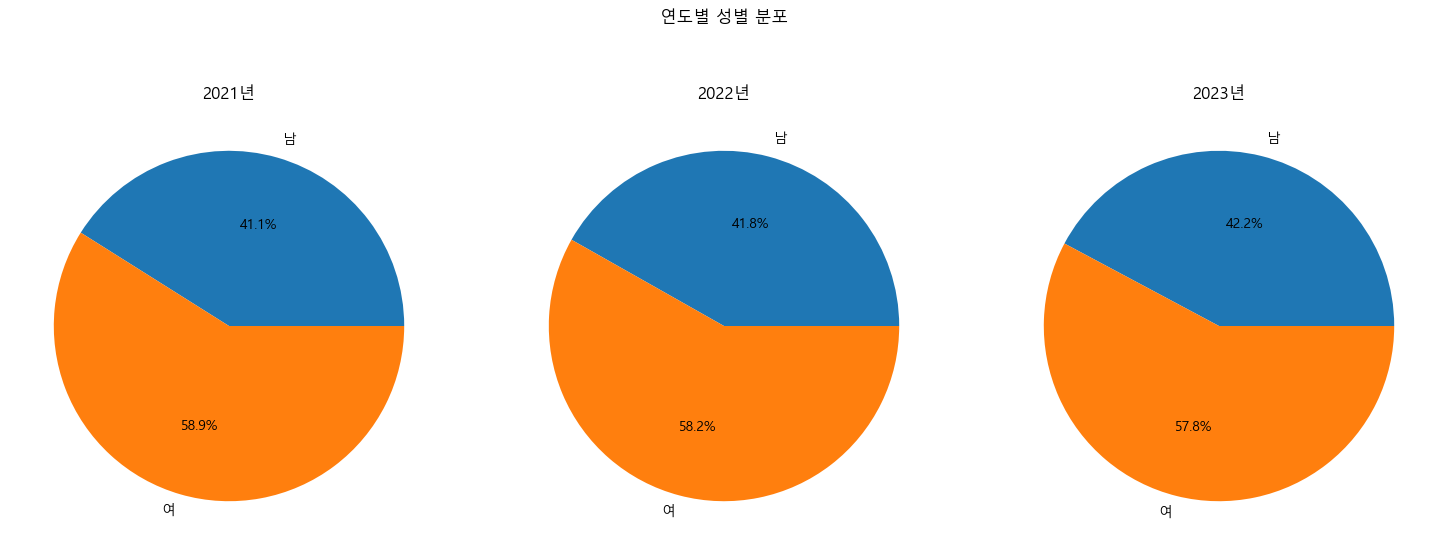

In [22]:
def plot_gender_pie_by_year(data):
    # 년도별로 성별 데이터 집계
    gender_by_year = data.groupby(['년도', '성별']).size().unstack()
    
    # 파이 차트 생성
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 각 년도별로 파이 차트 그리기
    for idx, year in enumerate(sorted(data['년도'].unique())):
        year_data = gender_by_year.loc[year]
        axes[idx].pie(year_data, labels=year_data.index, autopct='%1.1f%%')
        axes[idx].set_title(f'{year}년')
    
    plt.suptitle('연도별 성별 분포', y=1.1)
    plt.tight_layout()
    plt.show()

# 데이터로 파이 차트 그리기 
plot_gender_pie_by_year(data)

In [23]:
#plot_gender_pie_by_year(data2)

### 데이터에서 인터넷P/G 삭제

In [24]:
# 인터넷P/G 제거
data = data[data['가맹점업종명_범주화'] != '인터넷P/G']

In [25]:
data.shape

(467735, 24)

# 시각화

In [26]:
data.columns

Index(['Unnamed: 0', '거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수',
       '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기',
       '거래월', '년도', '가맹점업종명_범주화', '가맹점_인구', '자택_인구', '연도_분기', '금리', '소비자심리지수',
       '가맹점업종명_범주화_중분류'],
      dtype='object')

In [27]:
def plot_age_gender_amount_2(colname1, colname2, calc = 'sum', data = data, standard = '승인금액'):
    # Create a 6x2 subplot
    fig, axes = plt.subplots(6, 2, figsize=(15, 30))  # 6 rows, 2 columns

    # Plot index 
    plot_idx = 0
    # 연령대 순서 정의
    standard1 = data[colname1].unique()
    standard2 = data[colname2].unique()
    standard1.sort()
    standard2.sort()
    for a in standard1:
        for b in standard2:
            # Filtered DataFrame (subset)
            subset = data[(data[colname1] == a) & (data[colname2] == b)]

            if not subset.empty:
                # Calculate monthly sum of 'standard3'
                if calc == 'sum':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].sum().reset_index()
                elif calc == 'mean':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].mean().reset_index()
                elif calc == 'count':
                    monthly_sum_amount = subset.groupby('거래년월')[standard].count().reset_index()

                # Create line plot in the appropriate subplot
                ax = axes[plot_idx // 2, plot_idx % 2]
                sns.lineplot(data=monthly_sum_amount, x='거래년월', y=standard, ax=ax)
                ax.set_title(f"{b} - {a} [{standard}의 {calc}]")
                ax.set_xlabel("거래년월")
                ax.set_ylabel(f"{standard} {calc}")
                ax.tick_params(axis='x', rotation=45)

                plot_idx += 1

            # Adjust layout
    plt.tight_layout()
    plt.show()

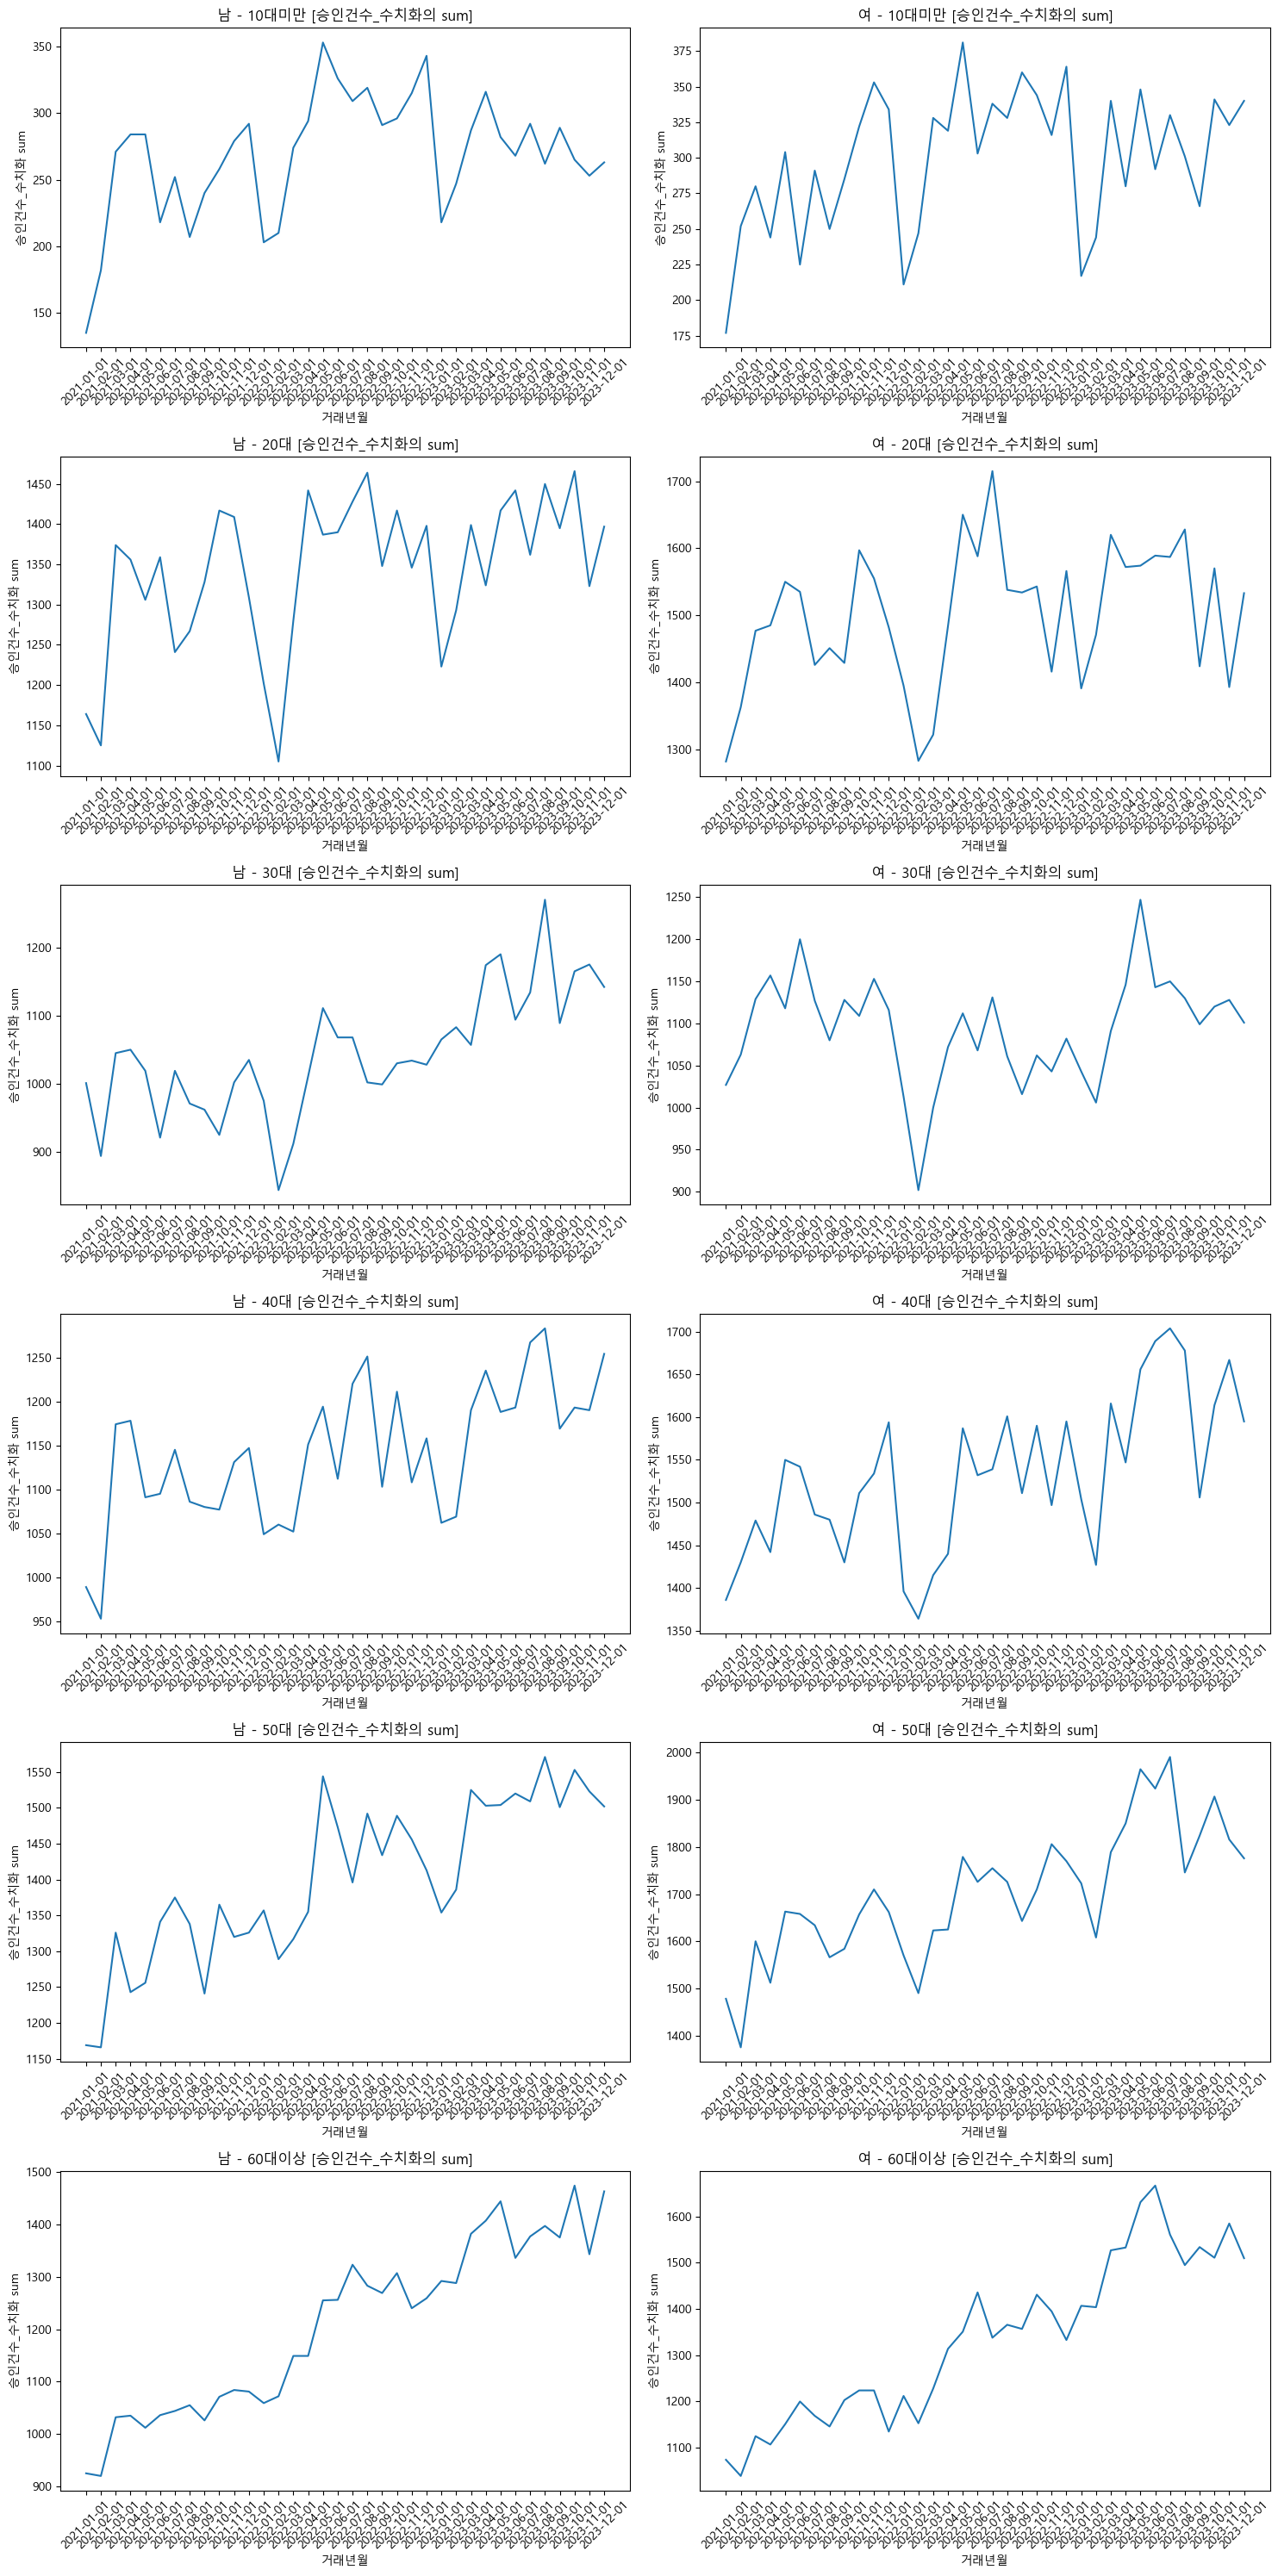

In [28]:
plot_age_gender_amount_2('연령대', '성별', calc = 'sum', standard='승인건수_수치화')

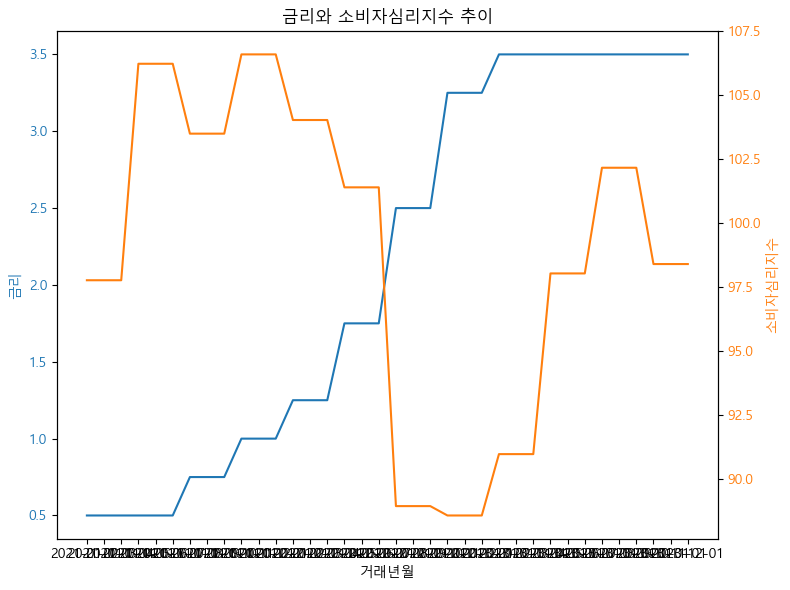

In [29]:
fig, ax1 = plt.subplots(figsize=(8, 6))

# 금리 그래프 (왼쪽 y축)
color1 = 'tab:blue'
ax1.set_xlabel('거래년월')
ax1.set_ylabel('금리', color=color1)
ax1.plot(data['거래년월'], data['금리'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

# 소비자심리지수 그래프 (오른쪽 y축)
ax2 = ax1.twinx()
color2 = 'tab:orange'
ax2.set_ylabel('소비자심리지수', color=color2)
ax2.plot(data['거래년월'], data['소비자심리지수'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.xticks(rotation = 45)
plt.title('금리와 소비자심리지수 추이')
plt.tight_layout()
plt.show()

In [30]:
pd.crosstab(data['연령대'], data['가맹점업종명_범주화'])

가맹점업종명_범주화,교통_및_물류,기타,서비스_및_여가,소매_및_생활용품,식생활
연령대,,,,,
10대미만,1636,2182,8611,1635,4416
20대,10314,5761,45538,6632,26168
30대,4922,6920,41622,4273,13616
40대,5255,13546,53060,5169,13076
50대,7411,26851,50904,5079,15099
60대이상,5427,29670,40762,3754,8426


## K-means, PCA 만 사용하여 클러스터링

## 연령-성별 그룹화


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 그룹: 30대-여, 40대-남, 40대-여

주요 업종 비율:
온라인쇼핑: 28.4%
서비스: 25.1%
식생활: 14.5%
기타: 12.9%
소매: 7.1%
교통_및_물류: 6.2%
라이프스타일: 2.2%
여가: 1.6%
의료: 1.2%
교육: 0.9%
--------------------------------------------------

Cluster 1 특징:
포함된 그룹: 50대-남, 50대-여, 60대이상-남, 60대이상-여

주요 업종 비율:
기타: 29.7%
서비스: 27.5%
온라인쇼핑: 12.7%
식생활: 12.1%
교통_및_물류: 6.9%
소매: 6.7%
라이프스타일: 1.8%
의료: 1.7%
여가: 0.8%
교육: 0.1%
--------------------------------------------------

Cluster 2 특징:
포함된 그룹: 10대미만-남, 10대미만-여, 20대-남, 20대-여, 30대-남

주요 업종 비율:
식생활: 25.8%
온라인쇼핑: 24.3%
서비스: 17.3%
교통_및_물류: 9.8%
기타: 9.5%
소매: 6.1%
여가: 3.2%
라이프스타일: 2.9%
의료: 1.0%
교육: 0.1%
--------------------------------------------------


<Figure size 1200x800 with 0 Axes>

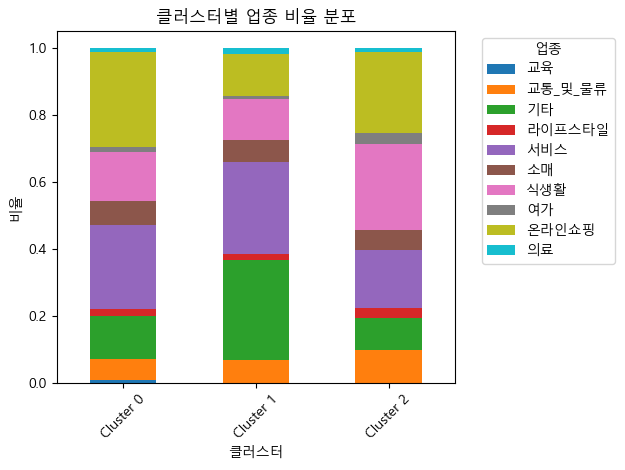

In [72]:
# 데이터 전처리 - 더 단순하게
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)

# K-means 직접 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(grouped_data)

# 클러스터별 평균 계산
cluster_means = []
for i in range(3):
    cluster_mask = clusters == i
    cluster_data = grouped_data[cluster_mask]
    cluster_means.append(cluster_data.mean())

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")
for i in range(3):
    cluster_groups = grouped_data.index[clusters == i]
    print(f"\nCluster {i} 특징:")
    print(f"포함된 그룹: {', '.join([f'{idx[0]}-{idx[1]}' for idx in cluster_groups])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    print("-" * 50)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 지역 그룹화

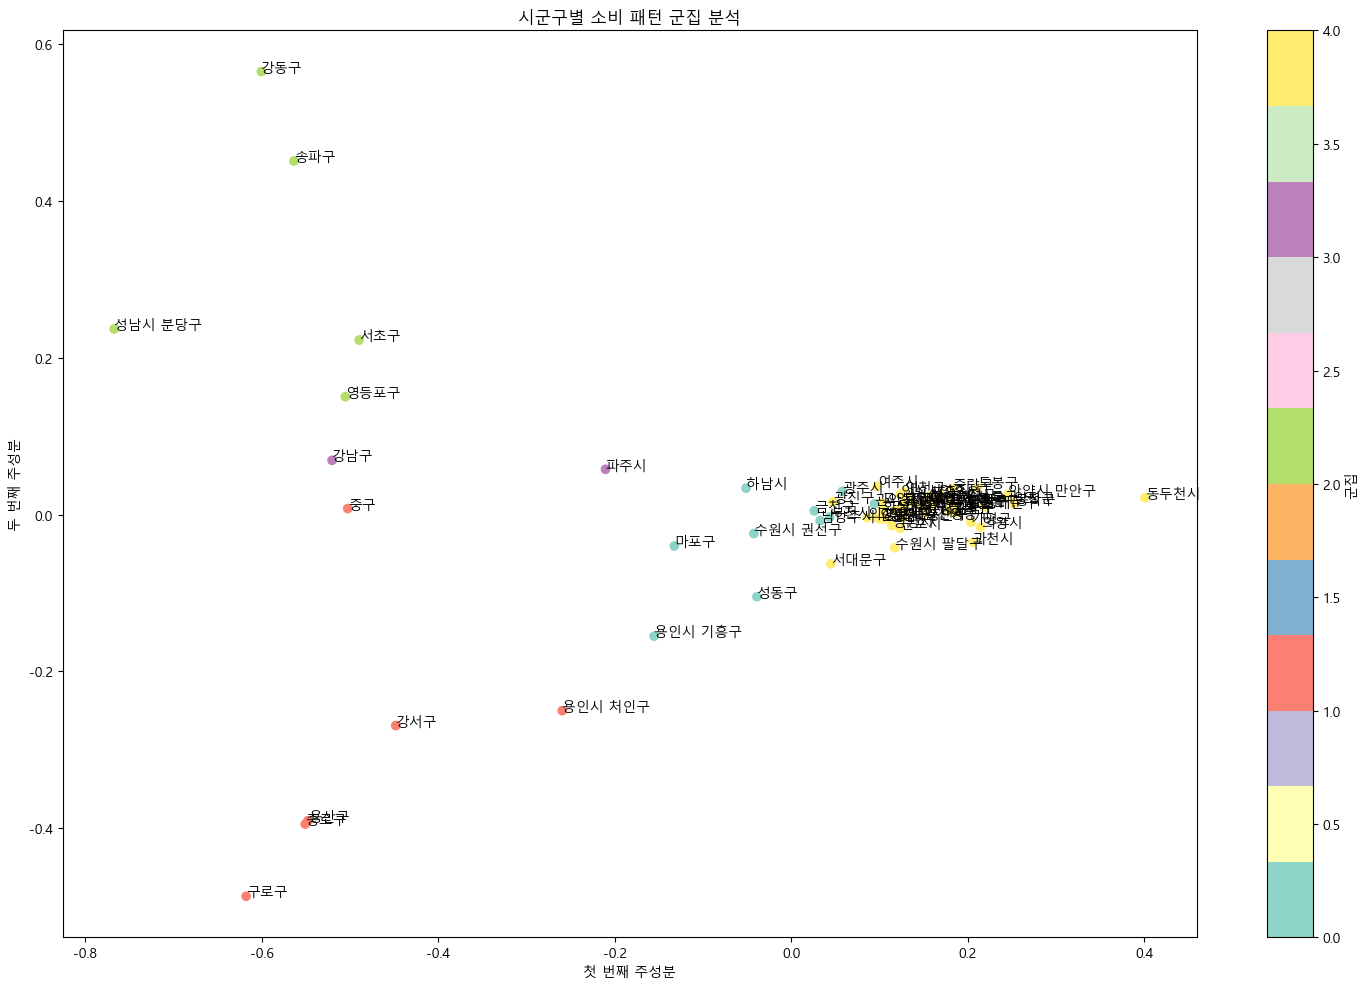


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 시군구: 관악구, 광주시, 금천구, 남양주시, 마포구, 부천시, 성동구, 수원시 권선구, 용인시 기흥구, 하남시

주요 업종 비율:
식생활: 53.6%
소매: 16.5%
서비스: 9.9%
라이프스타일: 5.6%
교통_및_물류: 4.2%
의료: 3.8%
여가: 3.2%
기타: 2.2%
온라인쇼핑: 0.9%
교육: 0.1%
--------------------------------------------------

Cluster 1 특징:
포함된 시군구: 강서구, 구로구, 용산구, 용인시 처인구, 종로구, 중구

주요 업종 비율:
서비스: 51.3%
식생활: 19.5%
기타: 8.1%
교통_및_물류: 6.3%
라이프스타일: 4.8%
소매: 2.9%
여가: 2.9%
온라인쇼핑: 2.7%
의료: 1.4%
교육: 0.1%
--------------------------------------------------

Cluster 2 특징:
포함된 시군구: 강동구, 서초구, 성남시 분당구, 송파구, 영등포구

주요 업종 비율:
온라인쇼핑: 54.7%
서비스: 15.3%
식생활: 13.2%
교통_및_물류: 6.5%
여가: 2.7%
라이프스타일: 2.3%
의료: 2.0%
소매: 2.0%
기타: 1.2%
교육: 0.0%
--------------------------------------------------

Cluster 3 특징:
포함된 시군구: 강남구, 파주시

주요 업종 비율:
소매: 47.4%
식생활: 15.0%
서비스: 12.2%
온라인쇼핑: 12.1%
교통_및_물류: 4.6%
교육: 3.2%
기타: 1.8%
의료: 1.7%
여가: 1.1%
라이프스타일: 0.8%
--------------------------------------------------

Cluster 4 특징:
포함된 시군구: 가평군, 강북구, 고양시 덕양구, 고양시 일산동구, 고양시 일산서구, 과천시, 광명시, 광진구, 구리

<Figure size 1200x800 with 0 Axes>

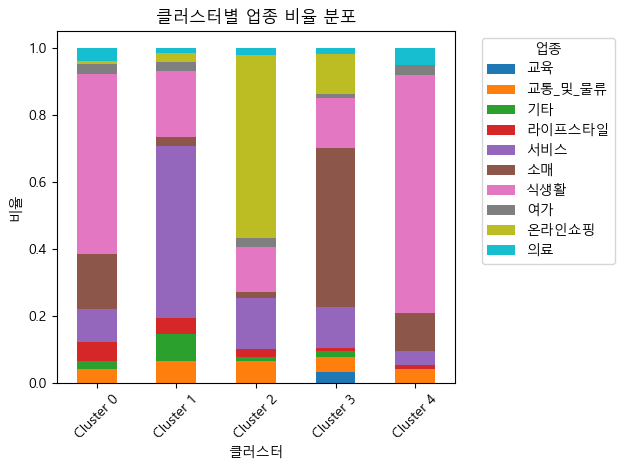

In [69]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화_중분류'], normalize='index')

# K-means 클러스터링으로 3개 그룹으로 분류
from sklearn.cluster import KMeans

# 클러스터링 수행
# K-means 클러스터링 수행
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# PCA를 사용하여 2차원으로 차원 축소
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
category_ratio_pca = pca.fit_transform(category_ratio)

# 산점도 시각화
plt.figure(figsize=(15, 10))
scatter = plt.scatter(category_ratio_pca[:, 0], category_ratio_pca[:, 1], c=clusters, cmap='Set3')
plt.title('시군구별 소비 패턴 군집 분석')
plt.xlabel('첫 번째 주성분')
plt.ylabel('두 번째 주성분')
plt.colorbar(scatter, label='군집')

# 각 점에 시군구 이름 표시
for i, txt in enumerate(category_ratio.index):
    plt.annotate(txt, (category_ratio_pca[i, 0], category_ratio_pca[i, 1]))

plt.tight_layout()
plt.show()

# 클러스터별 특징 출력
print("\n=== 각 클러스터의 특징 ===\n")

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(5):
    cluster_mask = clusters == i
    cluster_data = category_ratio[cluster_mask]
    cluster_means.append(cluster_data.mean())

for i in range(5):
    print(f"\nCluster {i} 특징:")
    print(f"포함된 시군구: {', '.join(category_ratio.index[clusters == i])}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means[i].sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    print("-" * 50)

# 클러스터별 업종 비율을 stacked bar plot으로 시각화
cluster_means_df = pd.DataFrame(cluster_means)
cluster_means_df.index = [f'Cluster {i}' for i in range(5)]

plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


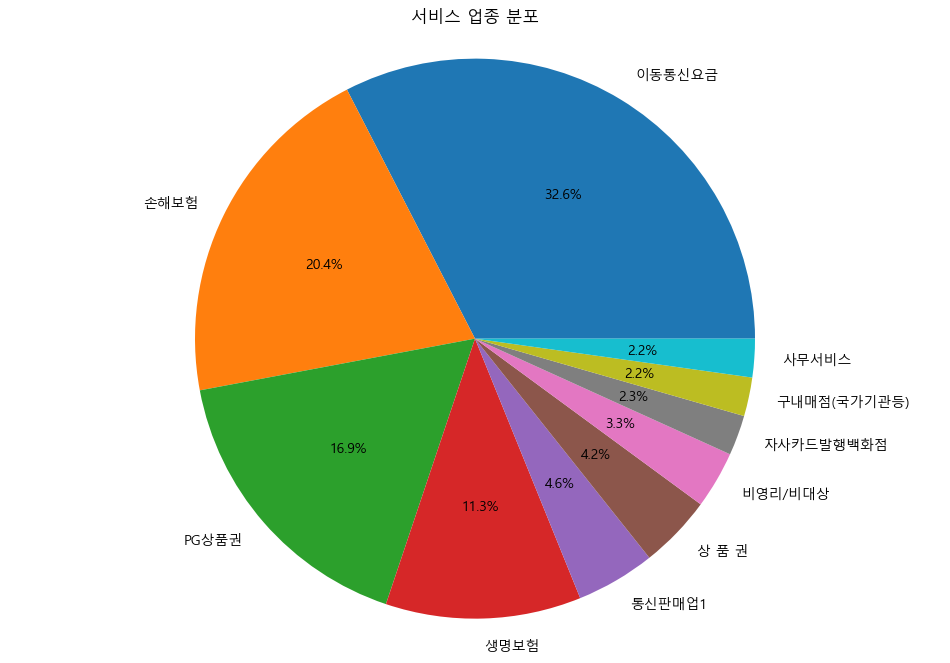

In [32]:
# 서비스 업종 데이터 추출
service_counts = data['가맹점업종명'][data['가맹점업종명_범주화_중분류'] == '서비스'].value_counts().head(10)

# 파이 차트 생성
plt.figure(figsize=(12, 8))
plt.pie(service_counts.values, labels=service_counts.index, autopct='%1.1f%%')
plt.title('서비스 업종 분포')
plt.axis('equal')
plt.show()

## 코드로 원래 데이터에 적용 (진행중)

In [75]:
# 그룹화 - 나이 및 성별

def age_gender_group(data):
    # np.where로 특정 조건에 맞게 그룹화 - K-means 클러스터링 적용
    
    group_A = (
        (data['연령대'] == '30대') & (data['성별'] == '남') |
        (data['연령대'] == '40대') & (data['성별'].isin(['남', '여']))
    )

    group_B = (
        (data['연령대'] == '50대')& (data['성별'].isin(['남', '여'])) |
        (data['연령대'] == '60대')& (data['성별'].isin(['남', '여']))
    )

    data['그룹_나이성별'] = np.where(group_A, 'A', np.where(group_B, 'B', 'C'))
    return data

In [ ]:
# 그룹화 - 지역
# 그룹이 다양하니 여기선 ampping을 사용하자.


def age_gender_group(data):
    
    # 범주화 떄 사용했던 것처럼 ampping을 활용한다.
    # 진행중...

In [77]:
data = age_gender_group(data)


In [78]:
data.columns

Index(['Unnamed: 0', '거래년월', '고객ID', '가맹점업종명', '가맹점_광역시도', '가맹점_시군구', '승인건수',
       '승인금액', '연령대', '성별', '고객등급', '자택_시도', '자택_시군구', '승인건수_수치화', '거래년월_분기',
       '거래월', '년도', '가맹점업종명_범주화', '가맹점_인구', '자택_인구', '연도_분기', '금리', '소비자심리지수',
       '가맹점업종명_범주화_중분류', '그룹_나이성별'],
      dtype='object')

## 이 밑으론 굳이 보지 않아도 됨


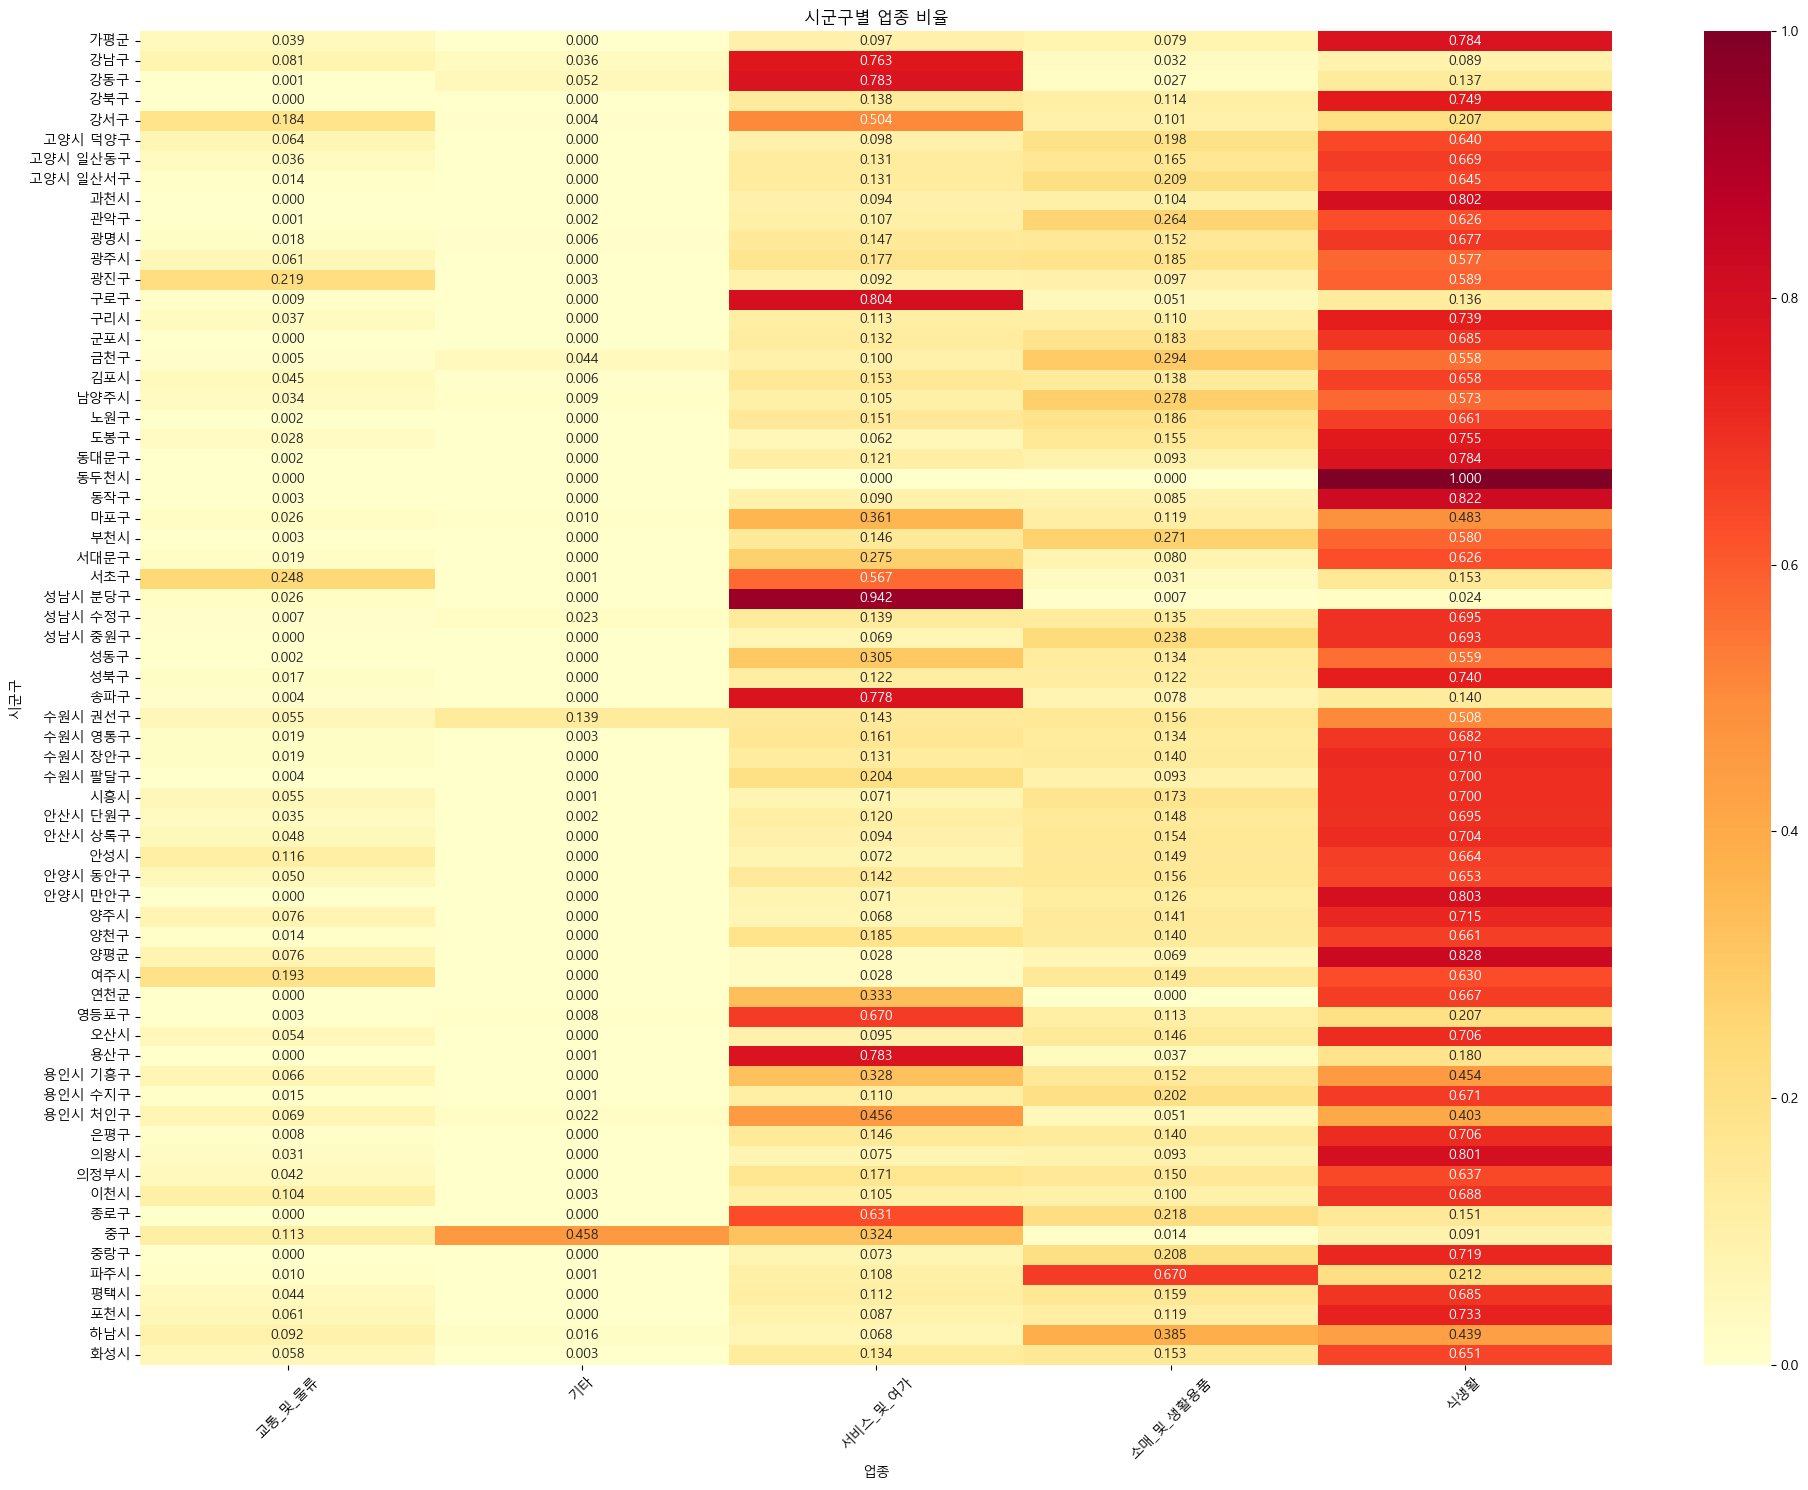


=== 군집별 시군구 ===

군집 0:
['관악구', '광주시', '금천구', '남양주시', '마포구', '부천시', '성동구', '수원시 권선구', '용인시 기흥구', '파주시', '하남시']

군집 1:
['강남구', '강동구', '강서구', '구로구', '서초구', '성남시 분당구', '송파구', '영등포구', '용산구', '용인시 처인구', '종로구', '중구']

군집 2:
['가평군', '강북구', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시', '광진구', '구리시', '군포시', '김포시', '노원구', '도봉구', '동대문구', '동두천시', '동작구', '서대문구', '성남시 수정구', '성남시 중원구', '성북구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시', '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '안양시 만안구', '양주시', '양천구', '양평군', '여주시', '연천군', '오산시', '용인시 수지구', '은평구', '의왕시', '의정부시', '이천시', '중랑구', '평택시', '포천시', '화성시']


C:\Users\campus3S031\AppData\Local\Temp\ipykernel_38968\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_38968\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
C:\Users\campus3S031\AppData\Local\Temp\ipykernel_38968\1809124373.py:42: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(cluster_means[i].index, rotation=45)


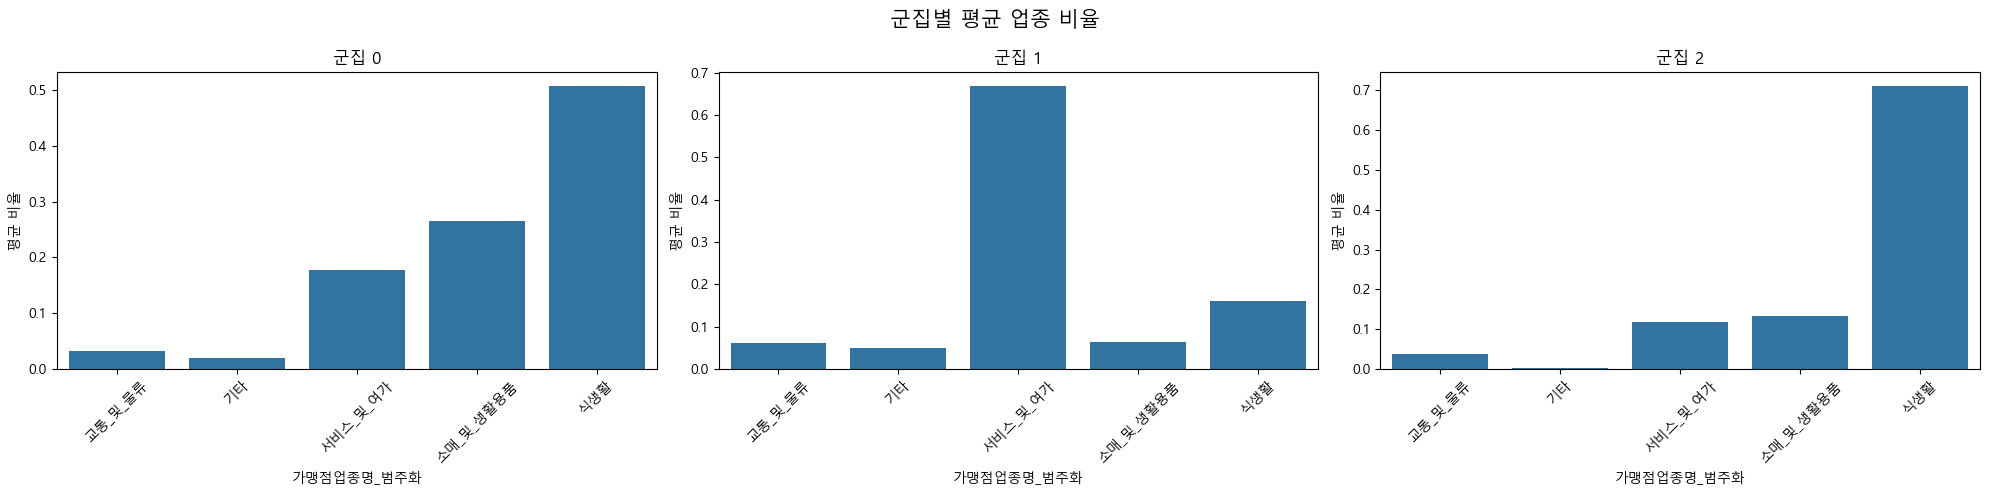

In [33]:
# 서울 내 지역별 소비 비율 비교
# 시군구별 업종 비율 계산
category_ratio = pd.crosstab(data['가맹점_시군구'], data['가맹점업종명_범주화'], normalize='index')

# 시각화
plt.figure(figsize=(20, 15))
sns.heatmap(category_ratio, cmap='YlOrRd', annot=True, fmt='.3f')
plt.title('시군구별 업종 비율')
plt.xlabel('업종')
plt.ylabel('시군구')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# K-means 클러스터링으로 3개 그룹으로 분류
from sklearn.cluster import KMeans

# 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(category_ratio)

# 결과 출력
category_ratio['군집'] = clusters
print("\n=== 군집별 시군구 ===")
for i in range(3):
    print(f"\n군집 {i}:")
    print(category_ratio[category_ratio['군집']==i].index.tolist())

# 군집별 평균 업종 비율 계산
cluster_means = []
for i in range(3):
    cluster_data = category_ratio[category_ratio['군집']==i].drop('군집', axis=1)
    cluster_means.append(cluster_data.mean())

# 시각화
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
fig.suptitle('군집별 평균 업종 비율', fontsize=15)

for i in range(3):
    sns.barplot(x=cluster_means[i].index, y=cluster_means[i].values, ax=axes[i])
    axes[i].set_title(f'군집 {i}')
    axes[i].set_xticklabels(cluster_means[i].index, rotation=45)
    axes[i].set_ylabel('평균 비율')

plt.tight_layout()
plt.show()



# 지역 그룹화 및 클러스터링
- 지역 위주의 EDA

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 467735 entries, 0 to 841275
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      467735 non-null  int64  
 1   거래년월            467735 non-null  object 
 2   고객ID            467735 non-null  int64  
 3   가맹점업종명          467735 non-null  object 
 4   가맹점_광역시도        467735 non-null  object 
 5   가맹점_시군구         467735 non-null  object 
 6   승인건수            467735 non-null  object 
 7   승인금액            467735 non-null  int64  
 8   연령대             467735 non-null  object 
 9   성별              467735 non-null  object 
 10  고객등급            467735 non-null  object 
 11  자택_시도           467735 non-null  object 
 12  자택_시군구          467735 non-null  object 
 13  승인건수_수치화        467735 non-null  int64  
 14  거래년월_분기         467735 non-null  int64  
 15  거래월             467735 non-null  object 
 16  년도              467735 non-null  int64  
 17  가맹점업종명_범주화     

# 차원축소 - 폐기 - 
- 지역별 소비 비율은 카이제곱으로
- 지역별 분류 및 클러스터링
- 분류 기준을 잡자

- PCA는 연속형 특화라 적용이 어려움
    - 따라서 찾은 방법은 T-sne => Umap => PacMap 
    - 순서대로 더 진보한 방법이라고 볼 수 있다.

- 그러나 차원축소 기법은 원래 고차원 데이터에 사용하기 위한 알고리즘으로, 시군구같이 데이터가 몇 십개에 불과한 경우 오히려 해석이 어렵고 과적합의 위험까지 있다.

### T-sne 차원축소 및 시각화 진행
- 가맹점 범주화를 기준으로 업종당 결제 비중이 비슷한 지역끼리 Clustering

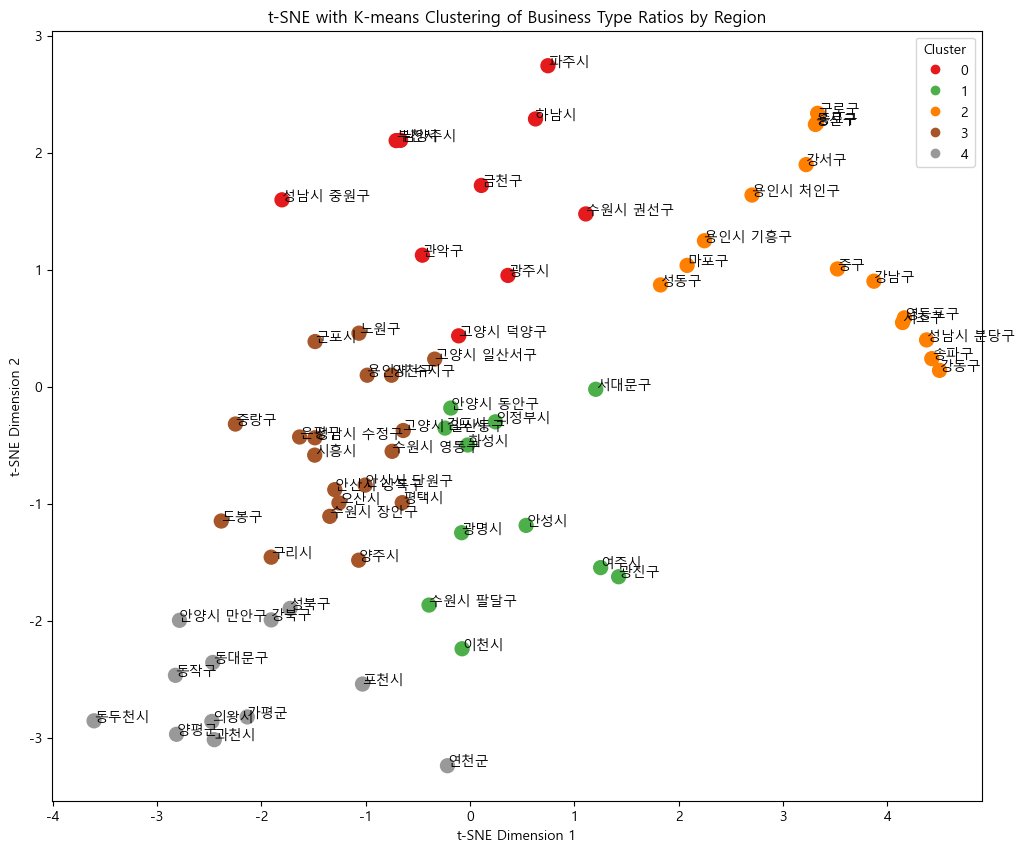


각 클러스터별 구성 시군구:

클러스터 0의 시군구:
['고양시 덕양구', '관악구', '광주시', '금천구', '남양주시', '부천시', '성남시 중원구', '수원시 권선구', '파주시', '하남시']

클러스터 1의 시군구:
['광명시', '광진구', '김포시', '서대문구', '수원시 팔달구', '안성시', '안양시 동안구', '여주시', '의정부시', '이천시', '화성시']

클러스터 2의 시군구:
['강남구', '강동구', '강서구', '구로구', '마포구', '서초구', '성남시 분당구', '성동구', '송파구', '영등포구', '용산구', '용인시 기흥구', '용인시 처인구', '종로구', '중구']

클러스터 3의 시군구:
['고양시 일산동구', '고양시 일산서구', '구리시', '군포시', '노원구', '도봉구', '성남시 수정구', '수원시 영통구', '수원시 장안구', '시흥시', '안산시 단원구', '안산시 상록구', '양주시', '양천구', '오산시', '용인시 수지구', '은평구', '중랑구', '평택시']

클러스터 4의 시군구:
['가평군', '강북구', '과천시', '동대문구', '동두천시', '동작구', '성북구', '안양시 만안구', '양평군', '연천군', '의왕시', '포천시']


각 클러스터별 평균 업종 비율:


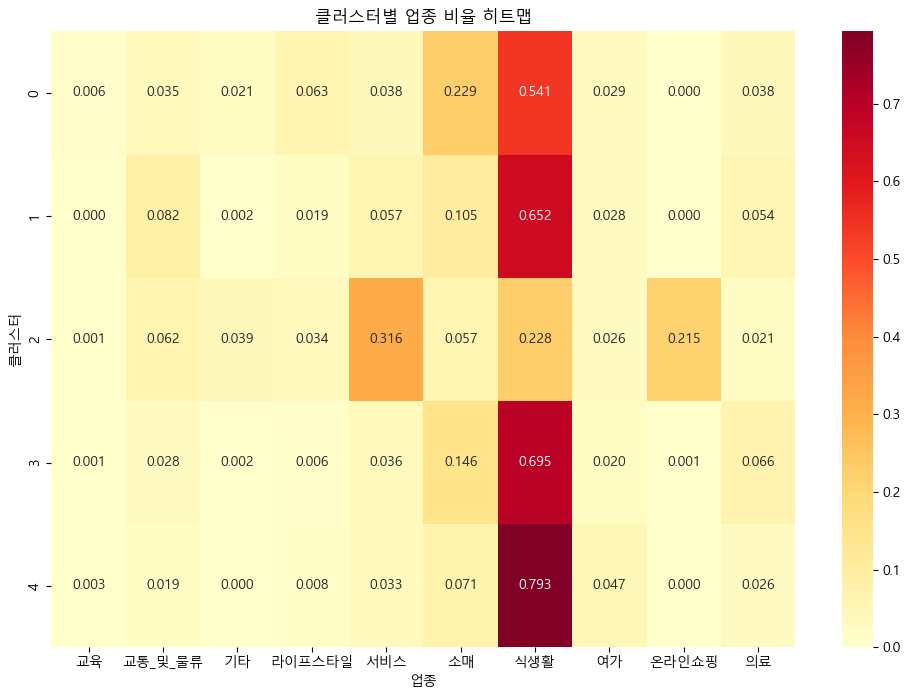

In [35]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

# 인터넷P/G를 빼야 할 것 같지만 일단은 넣어서 진행해보자.

dat_sne = data[['가맹점_시군구','가맹점업종명_범주화_중분류']]

# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, random_state=42) #차원을 2개로 축소
tsne_result = tsne.fit_transform(grouped_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)  # 군집 개수 조정 가능
grouped_data['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
grouped_data['t-SNE_1'] = tsne_result[:, 0]
grouped_data['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    grouped_data['t-SNE_1'], 
    grouped_data['t-SNE_2'],
    c=grouped_data['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 시군구 이름 표시
for idx, row in grouped_data.iterrows():
    plt.annotate(idx, (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 시군구와 평균 업종 비율 출력
print("\n각 클러스터별 구성 시군구:")
for cluster in range(5):
    print(f"\n클러스터 {cluster}의 시군구:")
    print(grouped_data[grouped_data['Cluster'] == cluster].index.tolist())
    
# 시각화 - 히트맵 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = grouped_data.groupby('Cluster')[['교육','교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means.round(3), annot=True, cmap='YlOrRd', fmt='.3f')
plt.title('클러스터별 업종 비율 히트맵')
plt.xlabel('업종')
plt.ylabel('클러스터')
plt.show()

### Umap을 적용해볼 수 있을까?
- 결과가 엄청나게 유의하지는 않을 듯 하다

In [36]:
#pip install umap-learn -qq
#!pip install numpy==2.0 -qq

In [37]:
import umap
from sklearn.cluster import KMeans

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# UMAP 적용으로 데이터 그룹화

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


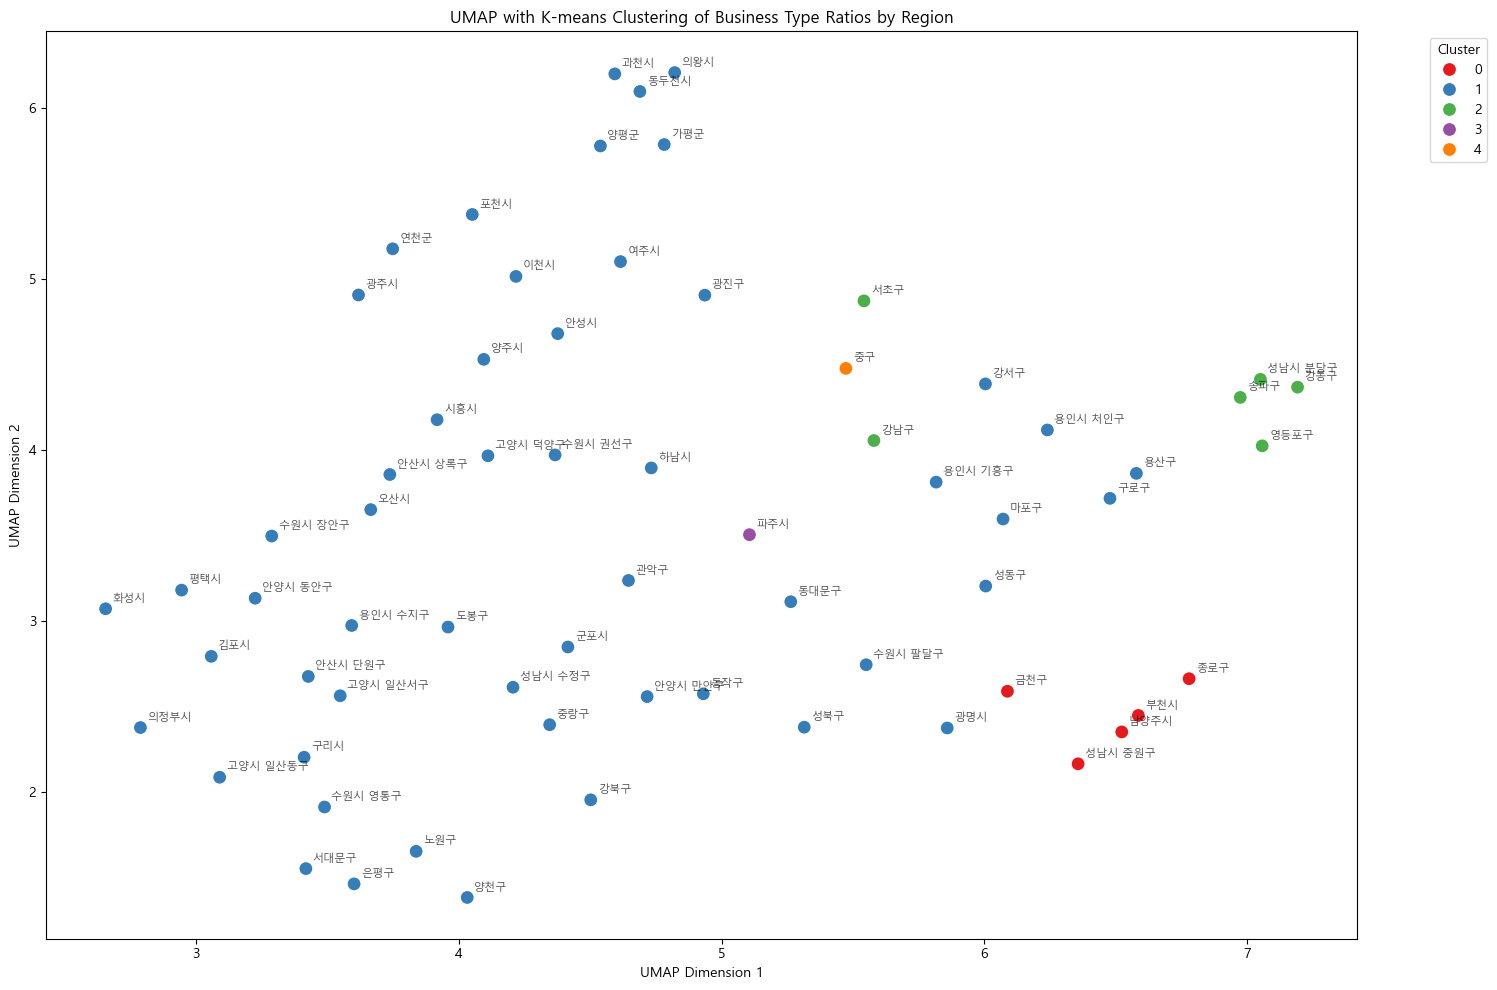


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 5

주요 업종 비율:
식생활: 51.1%
서비스: 15.4%
라이프스타일: 15.2%
소매: 11.1%
의료: 3.4%
여가: 1.4%
교통_및_물류: 1.3%
기타: 1.1%
온라인쇼핑: 0.0%
교육: 0.0%

대표적인 지역:
금천구, 남양주시, 부천시, 성남시 중원구, 종로구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 54

주요 업종 비율:
식생활: 65.0%
소매: 11.7%
서비스: 9.0%
의료: 4.7%
교통_및_물류: 4.4%
여가: 3.1%
라이프스타일: 1.3%
기타: 0.5%
온라인쇼핑: 0.3%
교육: 0.1%

대표적인 지역:
가평군, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 6

주요 업종 비율:
온라인쇼핑: 49.7%
서비스: 16.5%
식생활: 12.5%
교통_및_물류: 6.8%
소매: 6.4%
여가: 2.4%
라이프스타일: 2.1%
의료: 2.0%
기타: 1.6%
교육: 0.1%

대표적인 지역:
강남구, 강동구, 서초구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
소매: 66.6%
식생활: 21.2%
교육: 6.3%
의료: 1.7%
서비스: 1.6%
여가: 1.5%
교통_및_물류: 1.0%
라이프스타일: 0.2%
기타: 0.1%
온라인쇼핑: 0.0%

대표적인 지역:
파주시
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 1

주요 업종 비율:
기타: 45.8%
서비스: 19.3%
온라

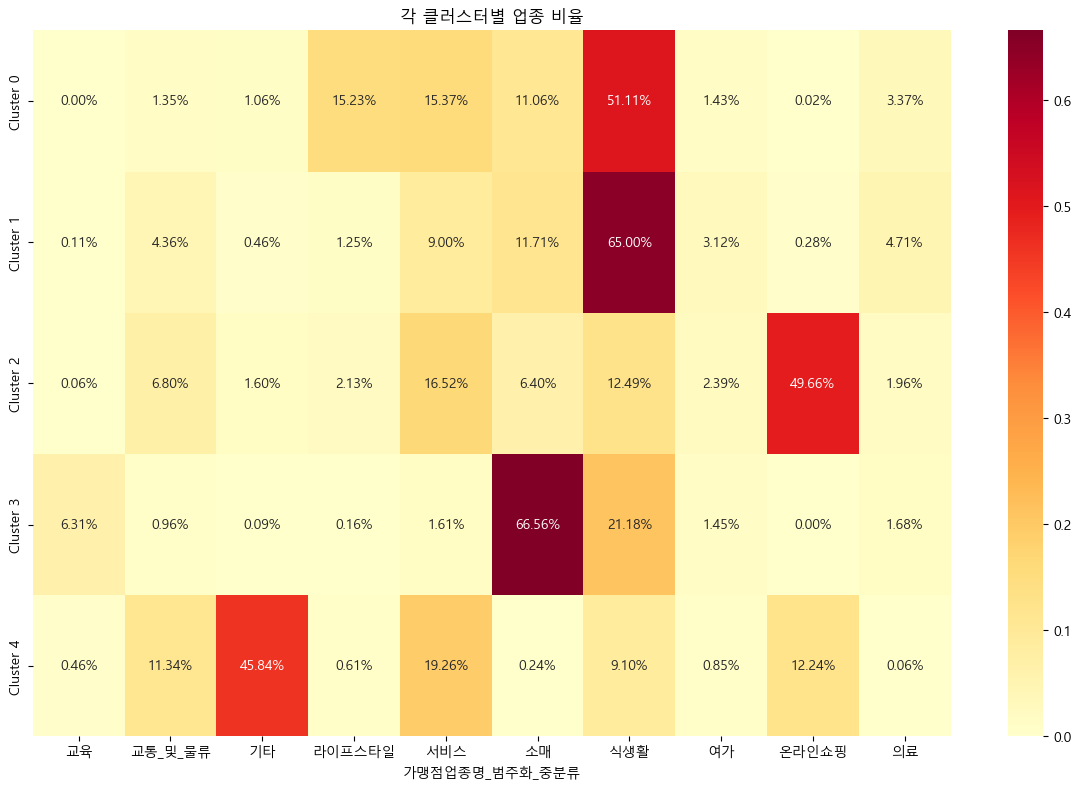

In [38]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    #n_neighbors=15,
    #min_dist=0.1
)
umap_result = umap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('UMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

In [39]:
# pacmap 설치
#!pip install pacmap
#!pip install --upgrade setuptools
import pacmap

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\pacmap\pacmap.py:845: UserWarning: Warning: random state is set to 42.
  warnings.warn(f'Warning: random state is set to {_RANDOM_STATE}.')


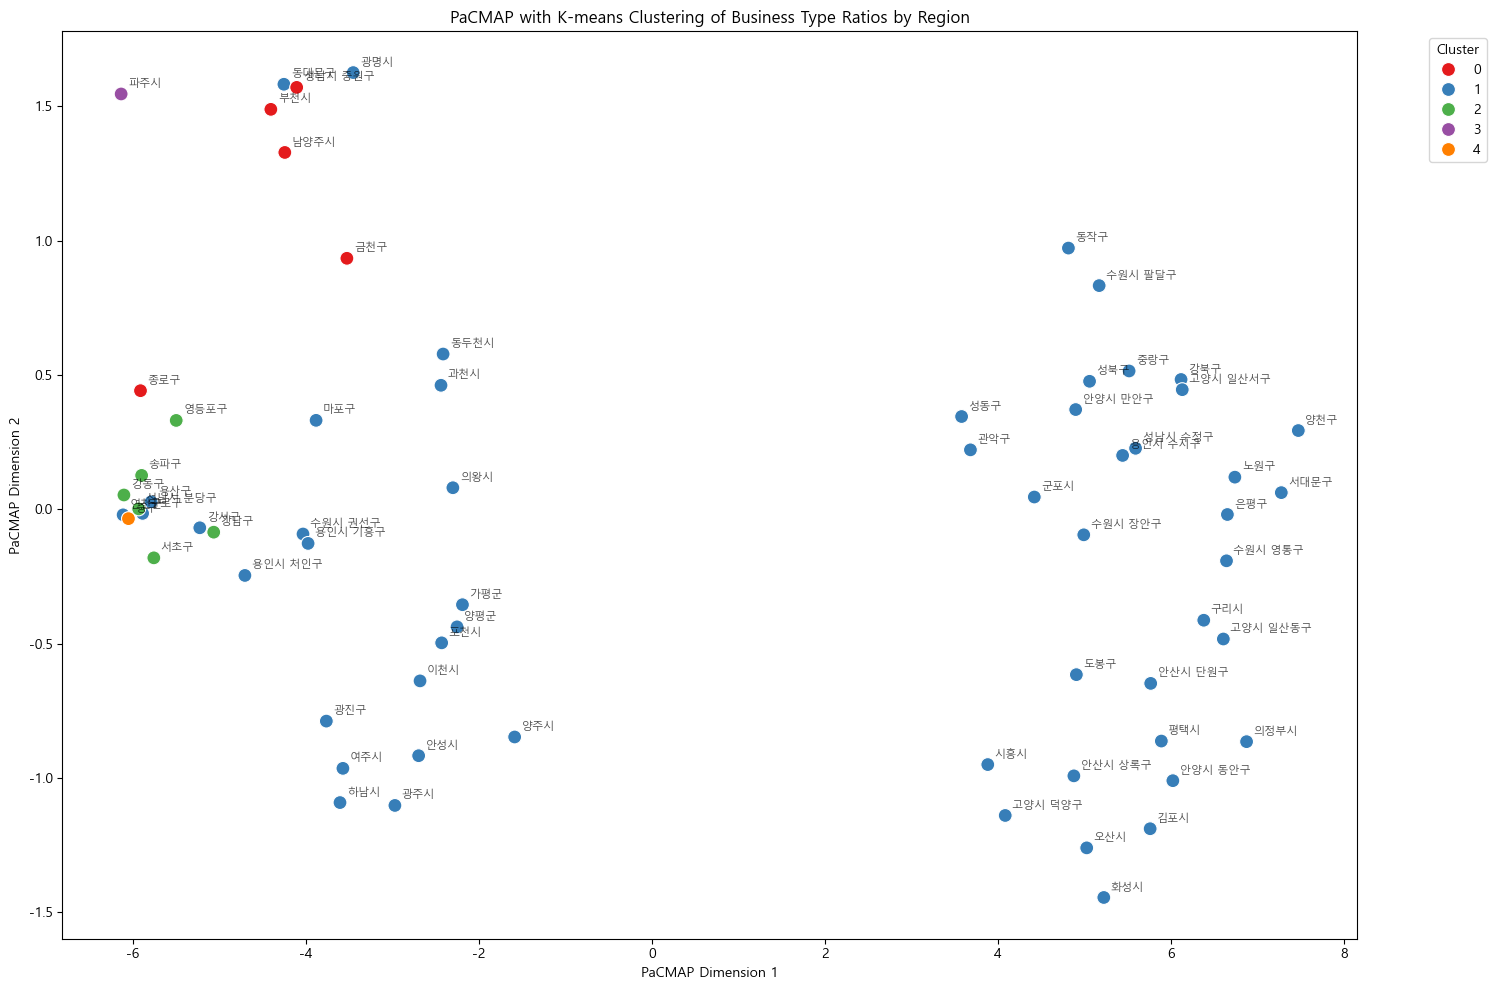


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 지역 수: 5

주요 업종 비율:
식생활: 51.1%
서비스: 15.4%
라이프스타일: 15.2%
소매: 11.1%
의료: 3.4%
여가: 1.4%
교통_및_물류: 1.3%
기타: 1.1%
온라인쇼핑: 0.0%
교육: 0.0%

대표적인 지역:
금천구, 남양주시, 부천시, 성남시 중원구, 종로구
--------------------------------------------------

Cluster 1 특징:
포함된 지역 수: 54

주요 업종 비율:
식생활: 65.0%
소매: 11.7%
서비스: 9.0%
의료: 4.7%
교통_및_물류: 4.4%
여가: 3.1%
라이프스타일: 1.3%
기타: 0.5%
온라인쇼핑: 0.3%
교육: 0.1%

대표적인 지역:
가평군, 강북구, 강서구, 고양시 덕양구, 고양시 일산동구
--------------------------------------------------

Cluster 2 특징:
포함된 지역 수: 6

주요 업종 비율:
온라인쇼핑: 49.7%
서비스: 16.5%
식생활: 12.5%
교통_및_물류: 6.8%
소매: 6.4%
여가: 2.4%
라이프스타일: 2.1%
의료: 2.0%
기타: 1.6%
교육: 0.1%

대표적인 지역:
강남구, 강동구, 서초구, 성남시 분당구, 송파구
--------------------------------------------------

Cluster 3 특징:
포함된 지역 수: 1

주요 업종 비율:
소매: 66.6%
식생활: 21.2%
교육: 6.3%
의료: 1.7%
서비스: 1.6%
여가: 1.5%
교통_및_물류: 1.0%
라이프스타일: 0.2%
기타: 0.1%
온라인쇼핑: 0.0%

대표적인 지역:
파주시
--------------------------------------------------

Cluster 4 특징:
포함된 지역 수: 1

주요 업종 비율:
기타: 45.8%
서비스: 19.3%
온라

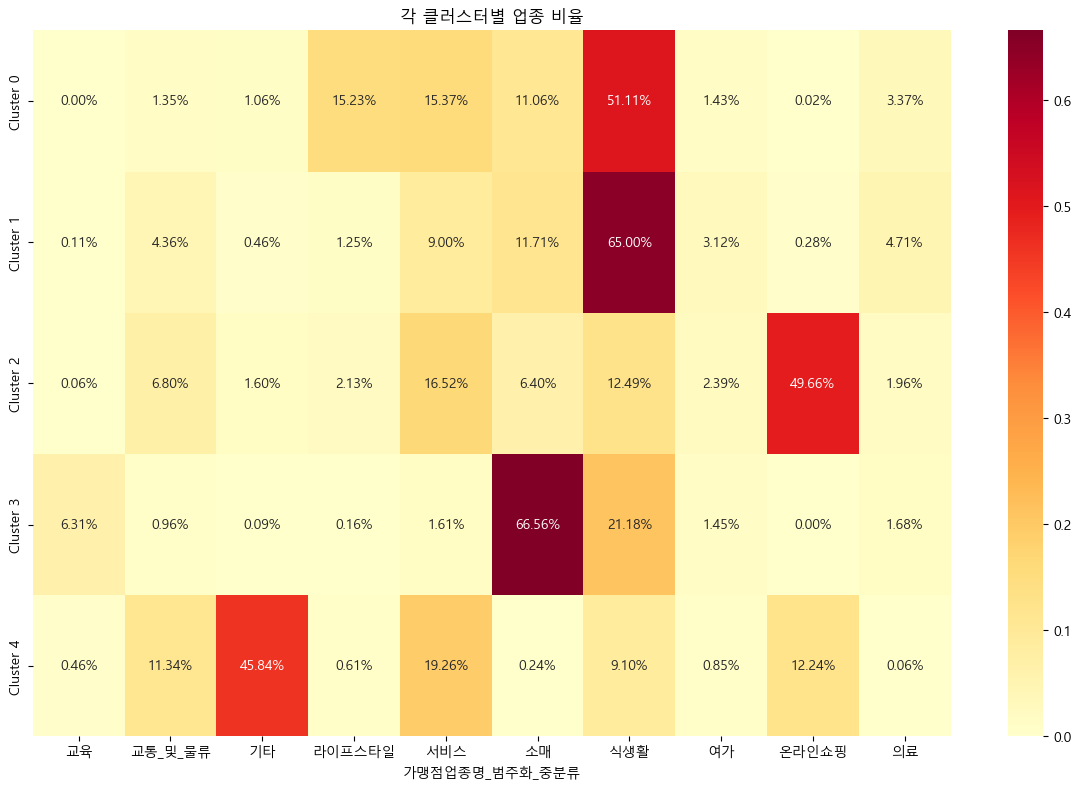

In [40]:
# 데이터 전처리
# 시군구별 가맹점업종명_범주화 비율 계산
grouped_data = data.groupby(['가맹점_시군구', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=15
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 시군구 이름 표시
for idx, row in result_df.iterrows():
    plt.annotate(idx, (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Business Type Ratios by Region')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(5):
    cluster_regions = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_regions].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 지역 수: {len(cluster_regions)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 지역:")
    print(", ".join(cluster_regions[:5]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(5)
], index=[f'Cluster {i}' for i in range(5)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

### 소비 패턴 비중을 중심으로 연령대, 성별로 나눈 후 3그룹으로 나누기
- 충분한 증거가 있어야 한다.
- T-sne, Umap, Pacmap 세 가지 모두로 돌려보자.

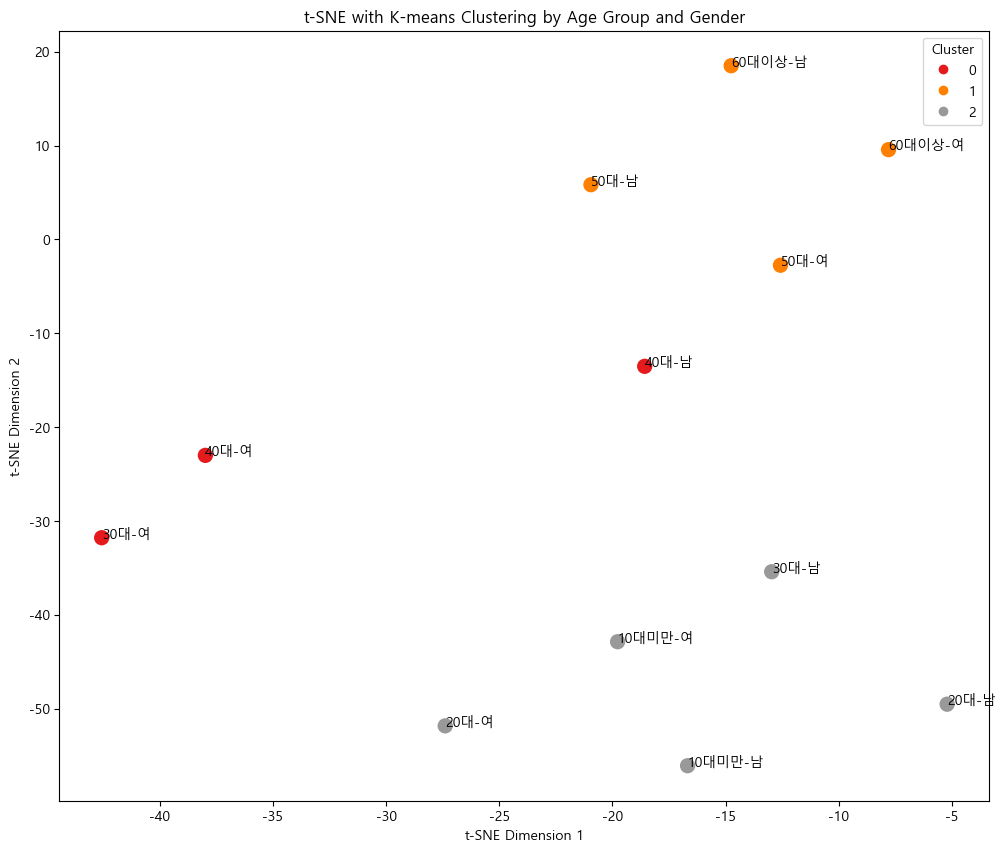


각 클러스터별 구성:

클러스터 0:
[('30대', '여'), ('40대', '남'), ('40대', '여')]

클러스터 1:
[('50대', '남'), ('50대', '여'), ('60대이상', '남'), ('60대이상', '여')]

클러스터 2:
[('10대미만', '남'), ('10대미만', '여'), ('20대', '남'), ('20대', '여'), ('30대', '남')]


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

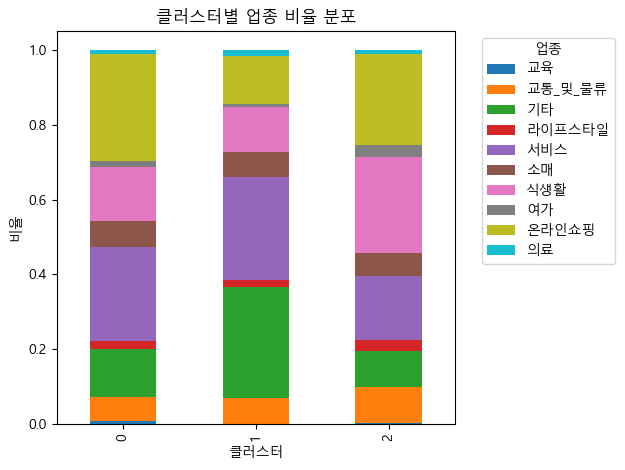

In [41]:
# T-sne 사용

dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# t-SNE를 사용하여 차원 축소
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
dat_sne['Cluster'] = kmeans.fit_predict(tsne_result)

# t-SNE 결과를 데이터프레임에 추가
dat_sne['t-SNE_1'] = tsne_result[:, 0]
dat_sne['t-SNE_2'] = tsne_result[:, 1]

# 시각화
plt.figure(figsize=(12, 10))
scatter = plt.scatter(
    dat_sne['t-SNE_1'],
    dat_sne['t-SNE_2'], 
    c=dat_sne['Cluster'],
    cmap='Set1',
    s=100
)

# 각 점에 연령대와 성별 표시
for idx, row in dat_sne.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['t-SNE_1'], row['t-SNE_2']))

plt.title('t-SNE with K-means Clustering by Age Group and Gender')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.show()

# 각 클러스터의 구성 출력
print("\n각 클러스터별 구성:")
for cluster in range(3):
    print(f"\n클러스터 {cluster}:")
    print(dat_sne[dat_sne['Cluster'] == cluster].index.tolist())
    
# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")
cluster_means = dat_sne.groupby('Cluster')[['교육', '교통_및_물류', '기타', '라이프스타일', '서비스', '소매', '식생활', '여가', '온라인쇼핑', '의료']].mean()

plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

c:\Users\campus3S031\Desktop\iMBank\iM_DiGital_Banker_academy\venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


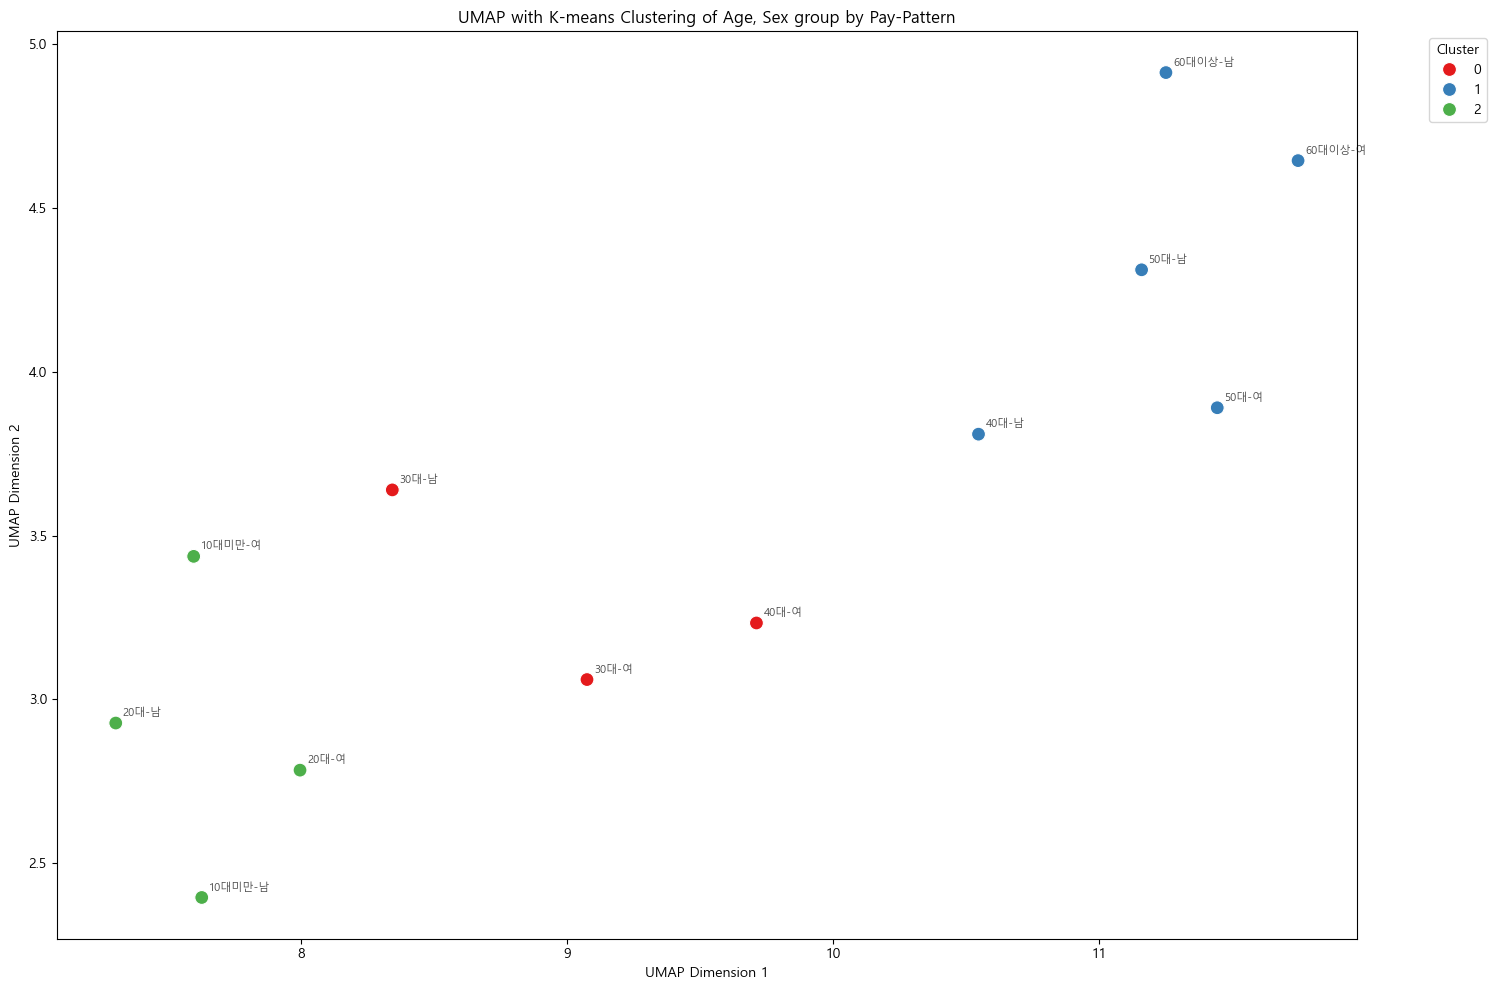


=== 각 클러스터의 특징 ===


Cluster 0 특징:
포함된 집단 수: 3

주요 업종 비율:
온라인쇼핑: 29.3%
서비스: 23.5%
식생활: 16.9%
기타: 11.0%
소매: 6.9%
교통_및_물류: 6.6%
라이프스타일: 2.2%
여가: 1.7%
의료: 1.2%
교육: 0.8%

대표적인 그룹:
30대-남, 30대-여, 40대-여
--------------------------------------------------

Cluster 1 특징:
포함된 집단 수: 5

주요 업종 비율:
서비스: 27.3%
기타: 27.2%
온라인쇼핑: 14.0%
식생활: 13.2%
교통_및_물류: 7.0%
소매: 6.8%
라이프스타일: 1.8%
의료: 1.6%
여가: 1.0%
교육: 0.2%

대표적인 그룹:
40대-남, 50대-남, 50대-여, 60대이상-남, 60대이상-여
--------------------------------------------------

Cluster 2 특징:
포함된 집단 수: 4

주요 업종 비율:
식생활: 26.0%
온라인쇼핑: 24.9%
서비스: 16.2%
교통_및_물류: 10.1%
기타: 9.0%
소매: 5.9%
여가: 3.6%
라이프스타일: 3.3%
의료: 1.0%
교육: 0.0%

대표적인 그룹:
10대미만-남, 10대미만-여, 20대-남, 20대-여
--------------------------------------------------


각 클러스터별 평균 업종 비율:


<Figure size 1200x800 with 0 Axes>

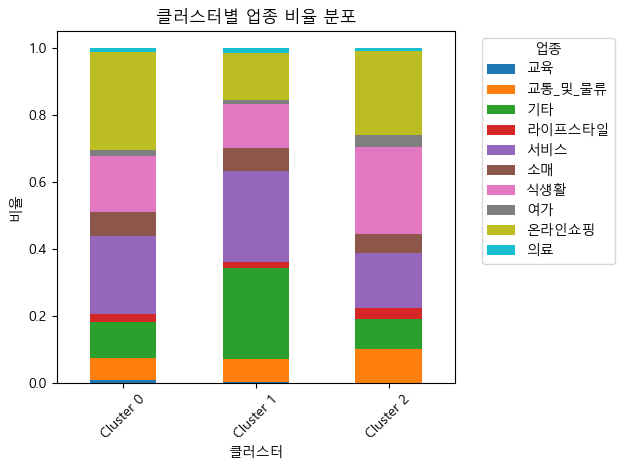

In [43]:
# Umap 사용

# 데이터 전처리
dat_sne = pd.crosstab(
    index=[data['연령대'], data['성별']], 
    columns=data['가맹점업종명_범주화_중분류'],
    normalize='index'
)

# UMAP 적용
umap_reducer = umap.UMAP(
    n_components=2,
    random_state=42,
    n_neighbors=5,  # 데이터 크기가 작으므로 n_neighbors 값을 줄임
    min_dist=0.1
)
umap_result = umap_reducer.fit_transform(dat_sne)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(umap_result)  # umap_result로 클러스터링

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'UMAP_1': umap_result[:, 0],
    'UMAP_2': umap_result[:, 1],
    'Cluster': clusters
})
result_df.index = dat_sne.index  # dat_sne의 인덱스 사용

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='UMAP_1',
    y='UMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 레이블 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", 
                (row['UMAP_1'], row['UMAP_2']), 
                xytext=(5, 5), 
                textcoords='offset points', 
                fontsize=8, 
                alpha=0.7)

plt.title('UMAP with K-means Clustering of Age, Sex group by Pay-Pattern')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):  # 3개 클러스터로 수정
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_means = dat_sne.loc[cluster_members].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 집단 수: {len(cluster_members)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_members[:5]]))
    print("-" * 50)

# 시각화 - Stacked Bar Plot 사용
print("\n\n각 클러스터별 평균 업종 비율:")

# 각 클러스터별 평균 업종 비율 계산
cluster_means = []
for cluster in range(3):
    cluster_members = result_df[result_df['Cluster'] == cluster].index
    cluster_mean = dat_sne.loc[cluster_members].mean()
    cluster_means.append(cluster_mean)

# DataFrame으로 변환
cluster_means_df = pd.DataFrame(cluster_means, index=[f'Cluster {i}' for i in range(3)])

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means_df.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 왜 안되는가?
- pacmap은 대규모 데이터를 다루는 데 특화되어있어서 꼴랑 12개짜리 그룹인 데이터는 비효율적이다.
- k-means를 사용해야 한다.

In [45]:
'''

# Pacmap을 사용해보자.

# 데이터 전처리
# 연령대, 성별별 가맹점업종명_범주화_중분류 비율 계산
grouped_data = data.groupby(['연령대', '성별', '가맹점업종명_범주화_중분류']).size().unstack(fill_value=0)
grouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환

# 데이터 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(grouped_data)
scaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)

scaled_data = grouped_data
# PaCMAP 적용
pacmap_reducer = pacmap.PaCMAP(
    n_components=2,
    random_state=42, 
    MN_ratio=0.5,           # Mid-near 비율
    FP_ratio=2.0,
    n_neighbors=4
)
pacmap_result = pacmap_reducer.fit_transform(scaled_data)

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# 결과 데이터프레임 생성
result_df = pd.DataFrame({
    'PaCMAP_1': pacmap_result[:, 0],
    'PaCMAP_2': pacmap_result[:, 1],
    'Cluster': clusters
})
result_df.index = grouped_data.index

# 시각화
plt.figure(figsize=(15, 10))
scatter = sns.scatterplot(
    data=result_df,
    x='PaCMAP_1',
    y='PaCMAP_2',
    hue='Cluster',
    palette='Set1',
    s=100
)

# 연령대-성별 표시
for idx, row in result_df.iterrows():
    plt.annotate(f"{idx[0]}-{idx[1]}", (row['PaCMAP_1'], row['PaCMAP_2']), 
                xytext=(5, 5), textcoords='offset points', 
                fontsize=8, alpha=0.7)

plt.title('PaCMAP with K-means Clustering of Age, Sex group by Business Type Ratios')
plt.xlabel('PaCMAP Dimension 1')
plt.ylabel('PaCMAP Dimension 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# 각 클러스터의 특징 분석
print("\n=== 각 클러스터의 특징 ===\n")
for cluster in range(3):
    cluster_groups = result_df[result_df['Cluster'] == cluster].index
    cluster_means = grouped_data.loc[cluster_groups].mean()
    
    print(f"\nCluster {cluster} 특징:")
    print(f"포함된 그룹 수: {len(cluster_groups)}")
    print("\n주요 업종 비율:")
    for category, ratio in cluster_means.sort_values(ascending=False).items():
        print(f"{category}: {ratio:.1%}")
    
    print("\n대표적인 그룹:")
    print(", ".join([f"{idx[0]}-{idx[1]}" for idx in cluster_groups[:5]]))
    print("-" * 50)

# 클러스터별 업종 비율 히트맵
plt.figure(figsize=(12, 8))
cluster_means = pd.DataFrame([
    grouped_data.loc[result_df[result_df['Cluster'] == i].index].mean()
    for i in range(3)
], index=[f'Cluster {i}' for i in range(3)])

sns.heatmap(cluster_means, annot=True, fmt='.2%', cmap='YlOrRd')
plt.title('각 클러스터별 업종 비율')
plt.tight_layout()
plt.show()

# Stacked Bar Plot 그리기
plt.figure(figsize=(12, 8))
cluster_means.plot(kind='bar', stacked=True)
plt.title('클러스터별 업종 비율 분포')
plt.xlabel('클러스터')
plt.ylabel('비율')
plt.legend(title='업종', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

'''

'\n\n# Pacmap을 사용해보자.\n\n# 데이터 전처리\n# 연령대, 성별별 가맹점업종명_범주화_중분류 비율 계산\ngrouped_data = data.groupby([\'연령대\', \'성별\', \'가맹점업종명_범주화_중분류\']).size().unstack(fill_value=0)\ngrouped_data = grouped_data.div(grouped_data.sum(axis=1), axis=0)  # 비율로 변환\n\n# 데이터 스케일링\nscaler = StandardScaler()\nscaled_data = scaler.fit_transform(grouped_data)\nscaled_data = pd.DataFrame(scaled_data, columns=grouped_data.columns, index=grouped_data.index)\n\nscaled_data = grouped_data\n# PaCMAP 적용\npacmap_reducer = pacmap.PaCMAP(\n    n_components=2,\n    random_state=42, \n    MN_ratio=0.5,           # Mid-near 비율\n    FP_ratio=2.0,\n    n_neighbors=4\n)\npacmap_result = pacmap_reducer.fit_transform(scaled_data)\n\n# K-means 클러스터링 적용\nkmeans = KMeans(n_clusters=3, random_state=42)\nclusters = kmeans.fit_predict(scaled_data)\n\n# 결과 데이터프레임 생성\nresult_df = pd.DataFrame({\n    \'PaCMAP_1\': pacmap_result[:, 0],\n    \'PaCMAP_2\': pacmap_result[:, 1],\n    \'Cluster\': clusters\n})\nresult_df.index = grouped_data.inde

# 소비 패턴 파악
- 패턴 파악을 먼저

### 차이검정 (Difference Test)

**차이검정**이란 두 개 이상의 집단에서 얻어진 데이터의 평균이나 분포에 차이가 있는지를 통계적으로 검정하는 기법입니다. 이 방법은 연구자가 **A/B 테스트**를 하거나, **집단 간 비교**를 할 때 주로 사용됩니다. 예를 들어, 새로운 광고 캠페인이 기존 캠페인보다 효과적인지 확인할 때, 또는 두 약물의 효과 차이를 비교할 때 유용합니다.

### 주요 차이검정 기법

1. **t-검정 (t-test)**
   - **독립표본 t-검정**: 서로 다른 두 집단의 평균을 비교할 때 사용합니다. 예를 들어, 남성과 여성의 키 평균 차이를 검정할 때.
   - **대응표본 t-검정 (paired t-test)**: 동일한 집단에서 두 번 측정한 데이터를 비교할 때 사용합니다. 예를 들어, 다이어트 전후의 체중 변화 비교.
   - **단일표본 t-검정 (one-sample t-test)**: 표본 평균이 특정 기준값과 다른지를 검정합니다.

2. **ANOVA (분산분석)**
   - 세 개 이상의 집단 간 평균 차이를 비교할 때 사용합니다. 예를 들어, 세 개의 마케팅 전략이 서로 다른 성과를 보이는지를 검정할 때.
   - **일원분산분석 (One-way ANOVA)**: 한 가지 독립변수에 대해 집단 간 차이를 분석.
   - **이원분산분석 (Two-way ANOVA)**: 두 가지 독립변수 간의 상호작용 효과를 분석.

3. **카이제곱 검정 (Chi-square test)**
   - 명목형 데이터 간의 분포 차이를 검정할 때 사용합니다. 예를 들어, 성별에 따라 선호하는 브랜드가 다른지를 분석할 때.
   - **적합도 검정**과 **독립성 검정**이 대표적입니다.

4. **Mann-Whitney U 검정**
   - 두 집단의 분포가 동일한지를 비교하는 비모수 검정입니다. 데이터가 정규분포를 따르지 않는 경우 사용합니다.

5. **Wilcoxon Signed-Rank Test**
   - 대응표본에 대해 비모수 검정을 수행합니다. 예를 들어, 약물 사용 전후의 통증 점수 비교 시.

6. **Kruskal-Wallis Test**
   - ANOVA의 비모수 버전으로, 세 개 이상의 독립 집단 간 차이를 검정합니다.

### 차이검정의 기본 가정

1. **정규성 가정**: 데이터가 정규분포를 따른다고 가정합니다. 정규성을 만족하지 않을 경우 비모수 검정을 사용합니다.
2. **등분산성 가정**: 각 집단의 분산이 동일하다고 가정합니다. 이 가정이 충족되지 않으면 Welch의 t-검정을 사용할 수 있습니다.
3. **독립성 가정**: 비교하고자 하는 집단이 서로 독립적이어야 합니다.

### 예시

#### 예시 1: 독립표본 t-검정
- 문제: A 마케팅 캠페인과 B 마케팅 캠페인의 전환율 차이를 비교하고 싶습니다.
- 검정 방법: 독립표본 t-검정을 사용하여 두 집단의 전환율 평균 차이를 검정합니다.

#### 예시 2: 대응표본 t-검정
- 문제: 신약을 투여하기 전과 후의 혈압 변화를 비교하고 싶습니다.
- 검정 방법: 대응표본 t-검정을 사용하여 동일한 집단의 두 시점 간 평균 차이를 분석합니다.

### 주의사항

- **p-value**: 차이검정에서 중요한 요소로, 귀무가설이 참이라는 가정 하에 현재 데이터를 관찰할 확률입니다. 일반적으로 p-value가 0.05 이하이면 귀무가설을 기각하고 유의미한 차이가 있다고 판단합니다.
- **효과 크기**: 차이가 통계적으로 유의미하더라도 실제 효과 크기가 작으면 실무에 의미가 없을 수 있습니다.

### 정리

차이검정은 집단 간의 차이를 분석하고 해석하는 데 필수적인 통계 기법입니다. 데이터의 분포와 연구 목적에 따라 적절한 차이검정 방법을 선택하는 것이 중요합니다.